In [56]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
import requests
import matplotlib
import graphviz
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [57]:
hra = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [58]:
hra.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [59]:
hra.info() #to check the null values and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [60]:
hra.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

# Data Sorting 

In [61]:
#statistical heatmap

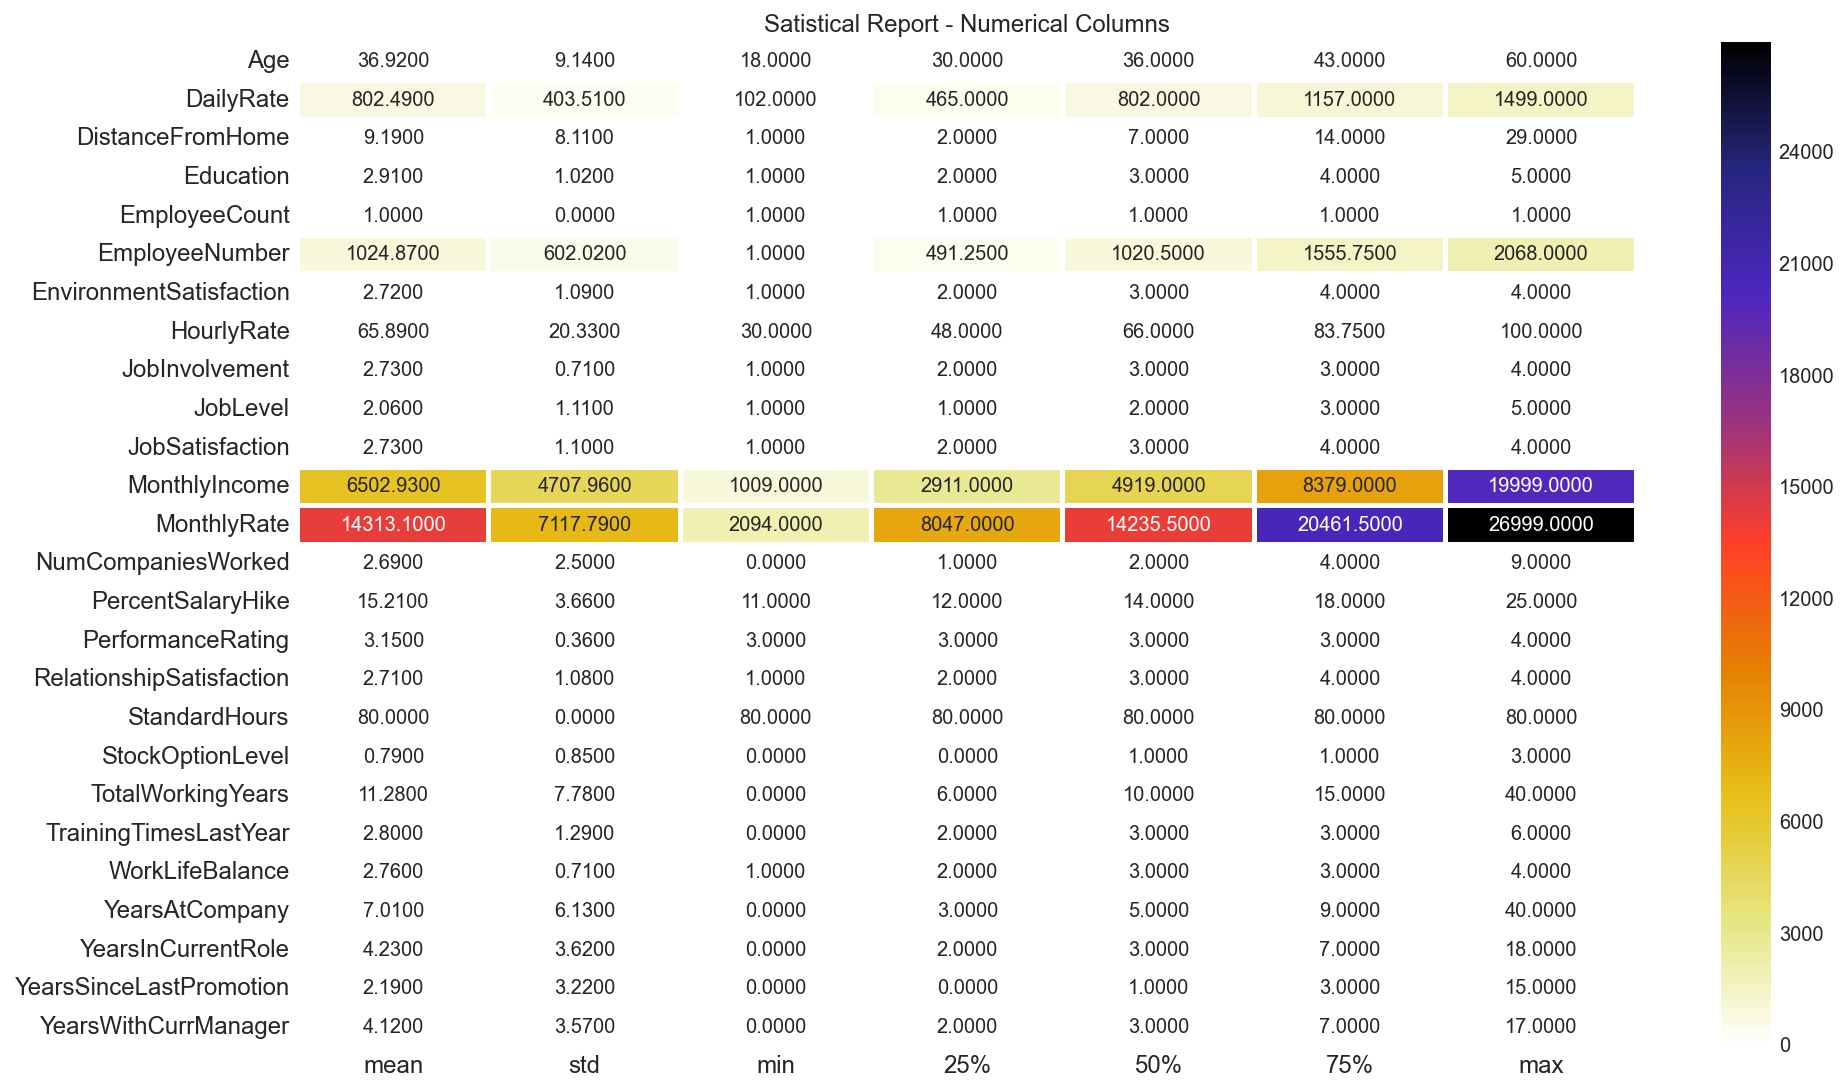

In [62]:
plt.figure(figsize = (15,9))
sns.heatmap(round(hra.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="CMRmap_r")
plt.title("Satistical Report - Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

#heatmap shows that MonthlyIncome and MonthlyRate has more numerical data in dataset.

In [63]:
#dropping the following columns which is not providing any insights or helpful for preparing ML Model.

hra.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

#Employeenumber - is unique identification number so it will not help anyway since we are preparing a chart.
#over18 - Every employee is 18+ as per the standard of any corporate jobs in india.

In [64]:
hra.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [65]:
#finding datatype of the column and converting to integer incase if it is object datatype in order to create the classification model.\

object_datatype = []
for x in hra.dtypes.index:
    if hra.dtypes[x] == 'O':
        object_datatype.append(x)
object_datatype

integer_datatype = []
for x in hra.dtypes.index:
    if hra.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

print("Object Data Type is : ", object_datatype)
print("Integer Data Type is : ", integer_datatype)

#here 8 columns holds the object data and rest of the column holds Integer data type.

Object Data Type is :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Integer Data Type is :  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [66]:
#checking for the total number of unique values present in each column be it categorical or numerical data.

hra.nunique().to_frame("Unique Values")

Unique Values
Age                                  43
Attrition                             2
BusinessTravel                        3
DailyRate                           886
Department                            3
DistanceFromHome                     29
Education                             5
EducationField                        6
EnvironmentSatisfaction               4
Gender                                2
HourlyRate                           71
JobInvolvement                        4
JobLevel                              5
JobRole                               9
JobSatisfaction                       4
MaritalStatus                         3
MonthlyIncome                      1349
MonthlyRate                        1427
NumCompaniesWorked                   10
OverTime                              2
PercentSalaryHike                    15
PerformanceRating                     2
RelationshipSatisfaction              4
StockOptionLevel                      4
TotalWorkingYears                    40
TrainingTimesLastYear                 7
WorkLifeBalance                       4
YearsAtCompany                       37
YearsInCurrentRole                   19
YearsSinceLastPromotion              16
YearsWithCurrManager                 18

# Visualization

In [67]:
#countplots

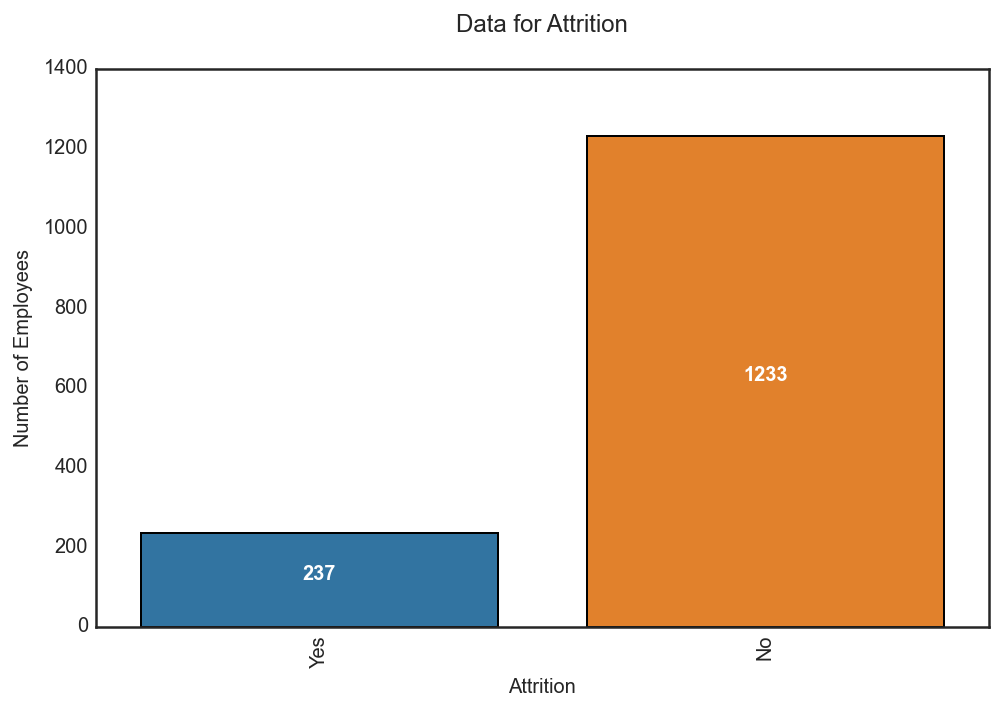

In [68]:
plt.figure(figsize=(8,5))
col_name = 'Attrition'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="tab10")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#the below result shows a imbalanced data we need to treated the same since it is about the attrition.

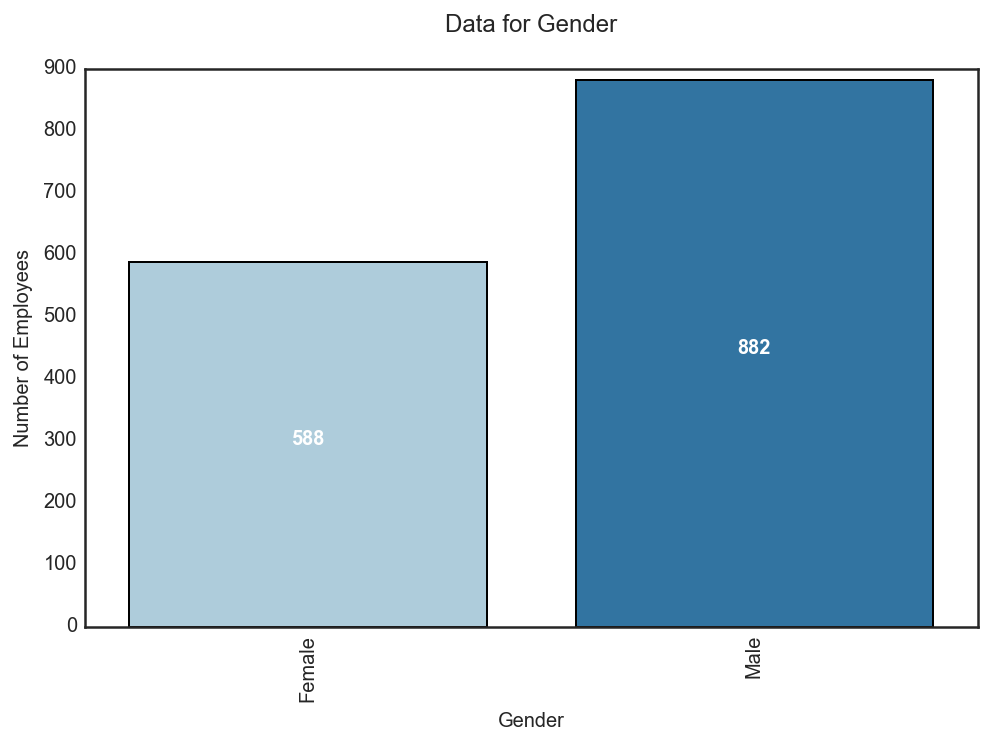

In [69]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="Paired")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#in gender comparisson we have more male staffs than female staffs.

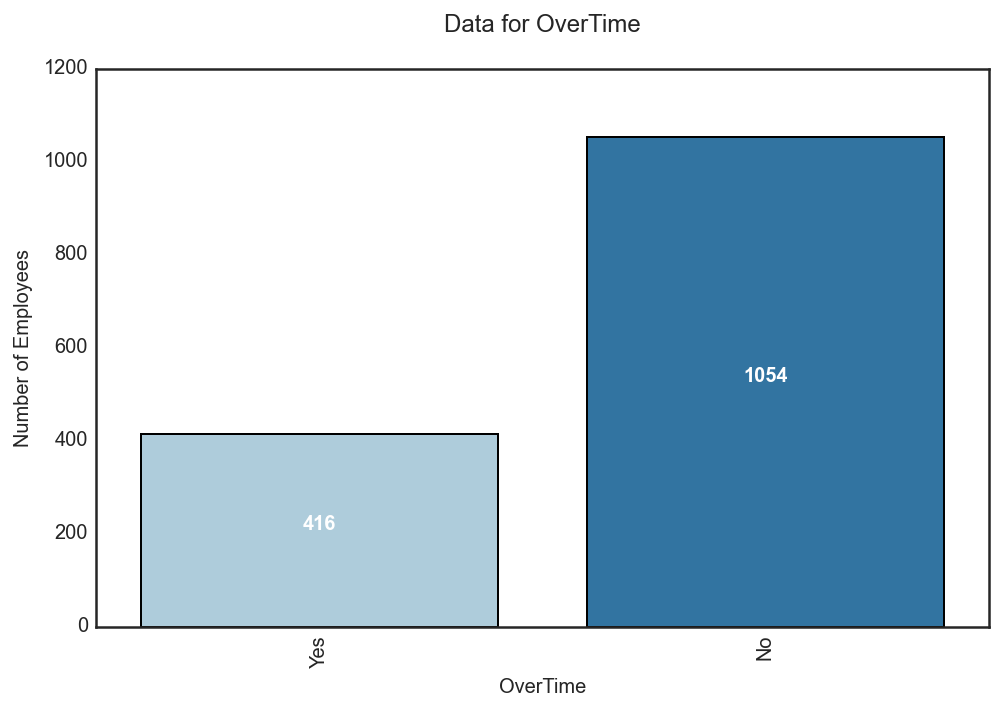

In [70]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="Paired")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#the below result shows the preferrence of the staffs on doing the work within office hours and avoiding overtime.

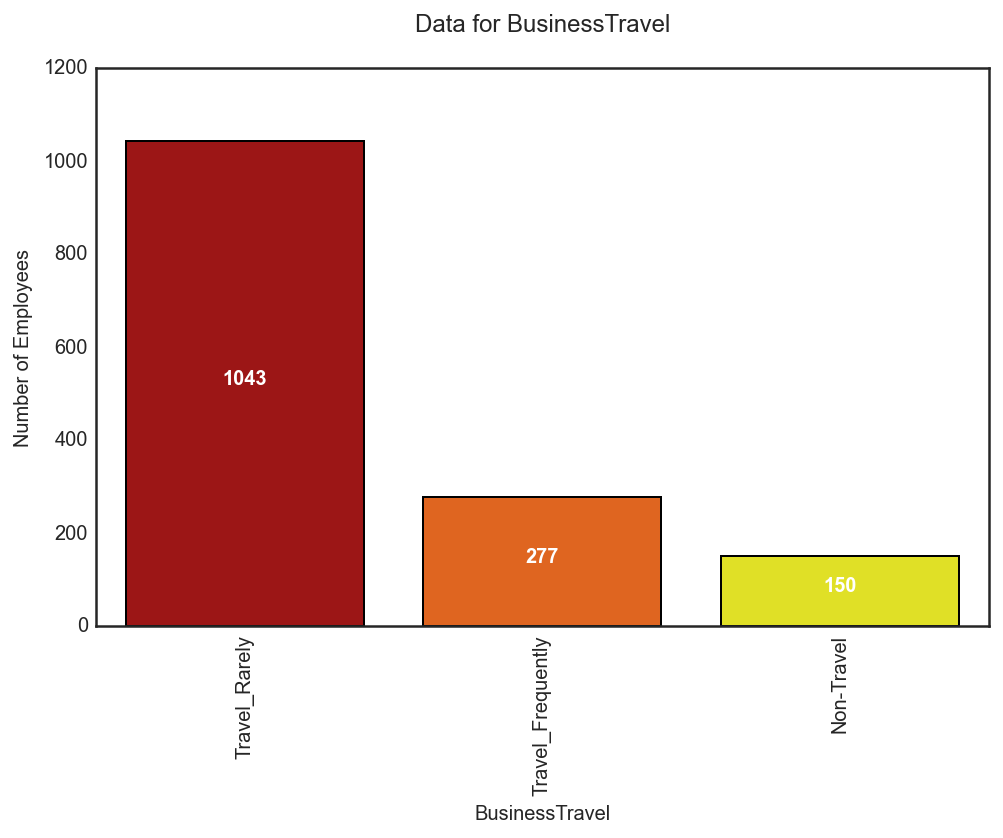

In [71]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="hot")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#below result shows the how many staffs travel and the prefrence.

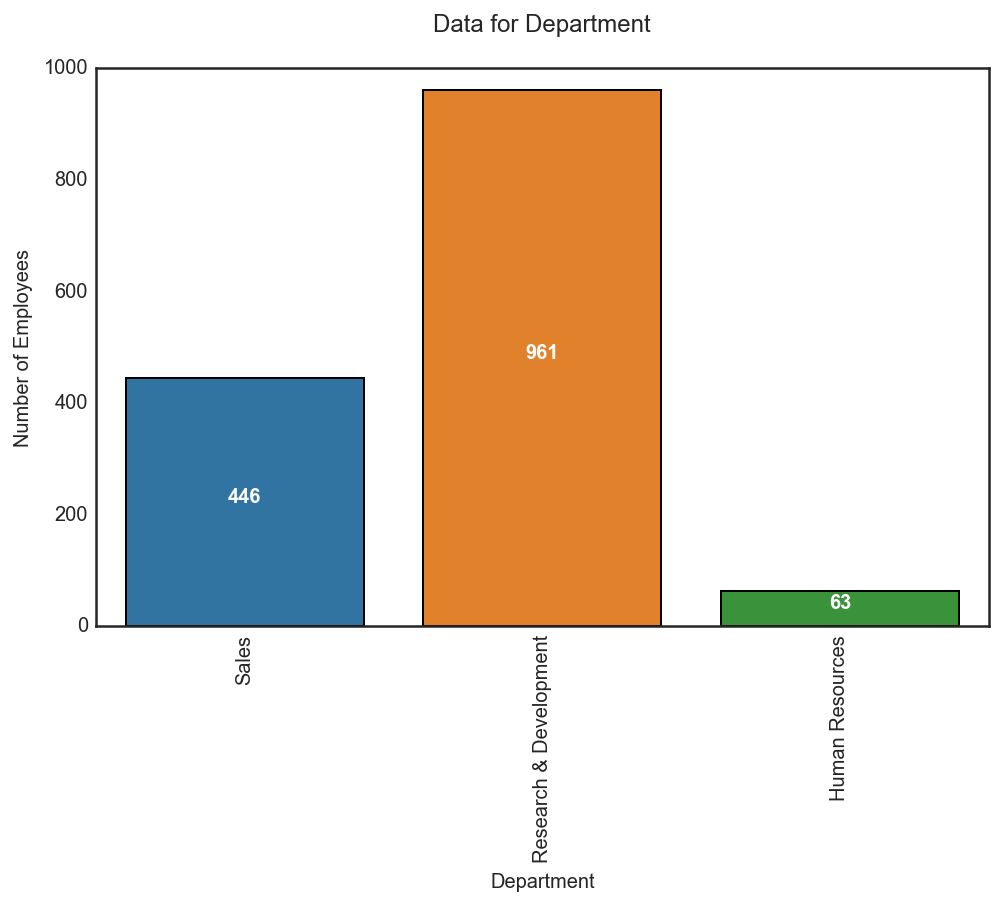

In [72]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="tab10")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#shows the department level bifurcation to understand more about the job roles indirectly.

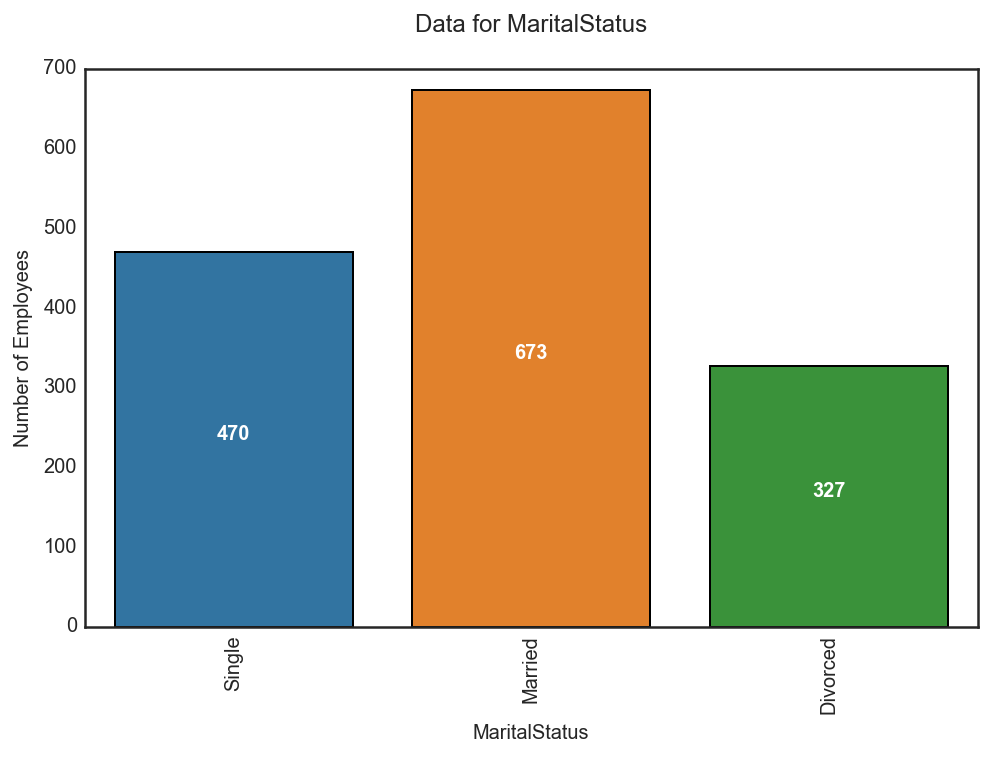

In [73]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="tab10")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#shows the data of martial status in which married staffs are higher and lowest divorced staffs.

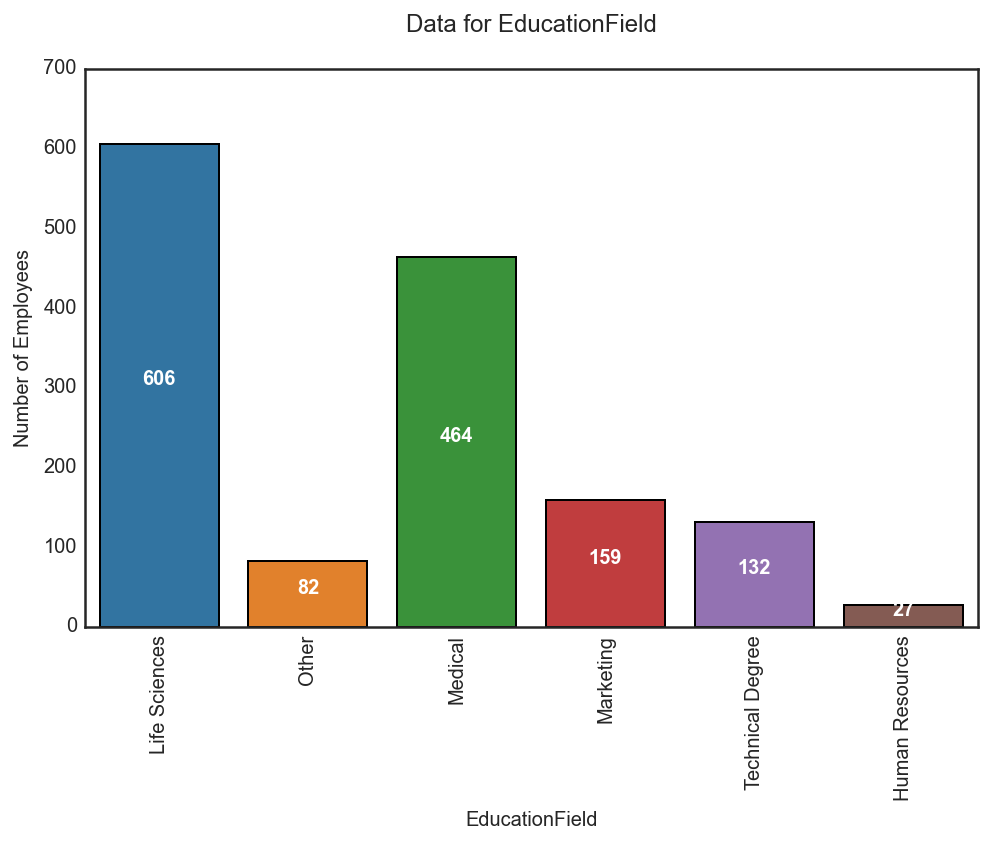

In [74]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="tab10")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#shows the majors of the staffs within the company. Lifescience with highest and lowest of HR since HR department is smaller so its not going to have much impact.

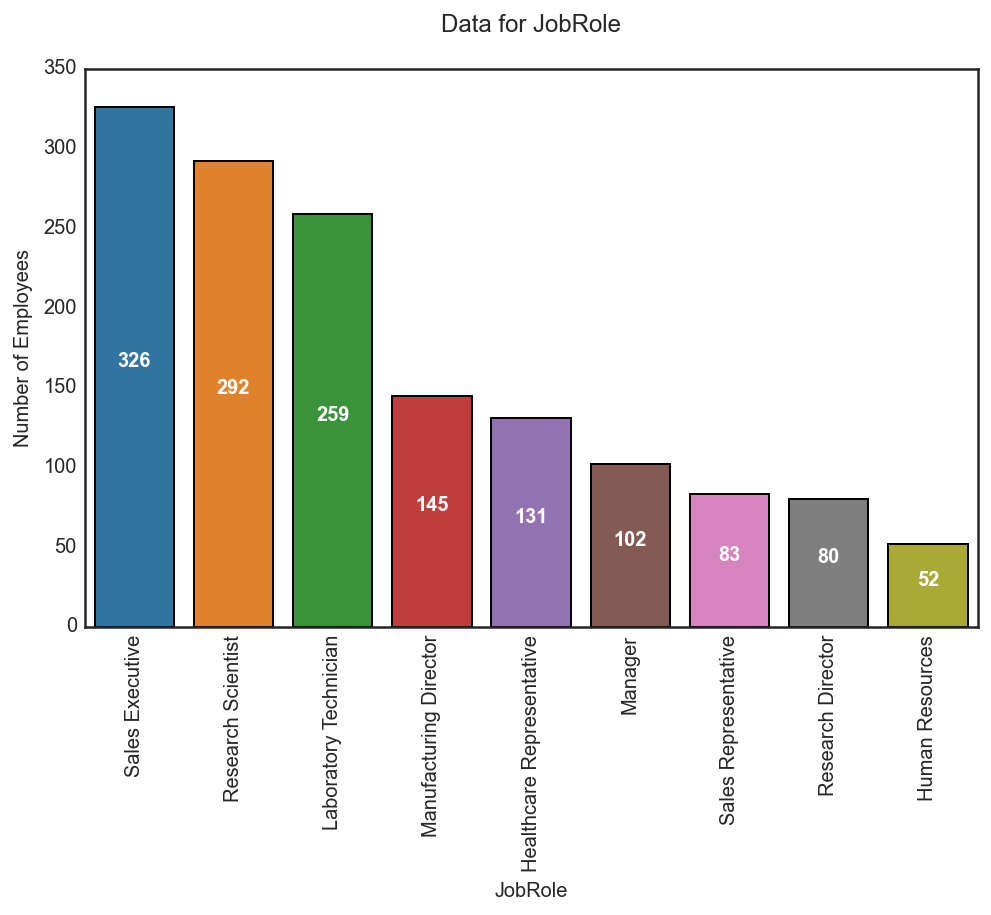

In [75]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = hra[col_name].value_counts()
index = 0
ax = sns.countplot(hra[col_name], palette="tab10")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Data for {col_name}\n")
plt.ylabel(f"Number of Employees")
plt.xticks(rotation=90)
plt.show()

#shows the teamsize and the jobrole of an group of individuals.

Attrition data percentage ->


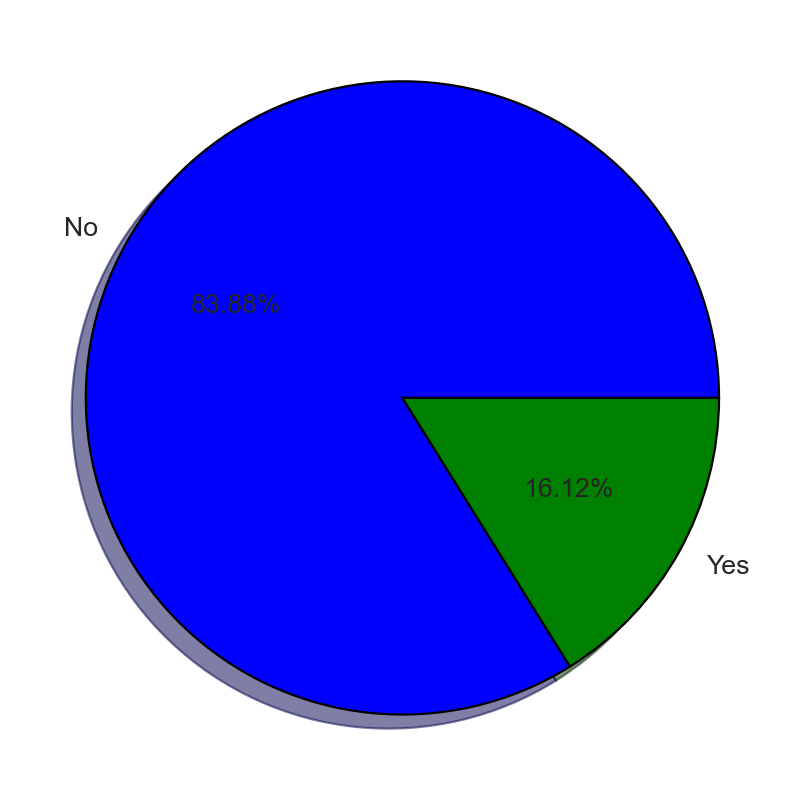

Gender data percentage ->


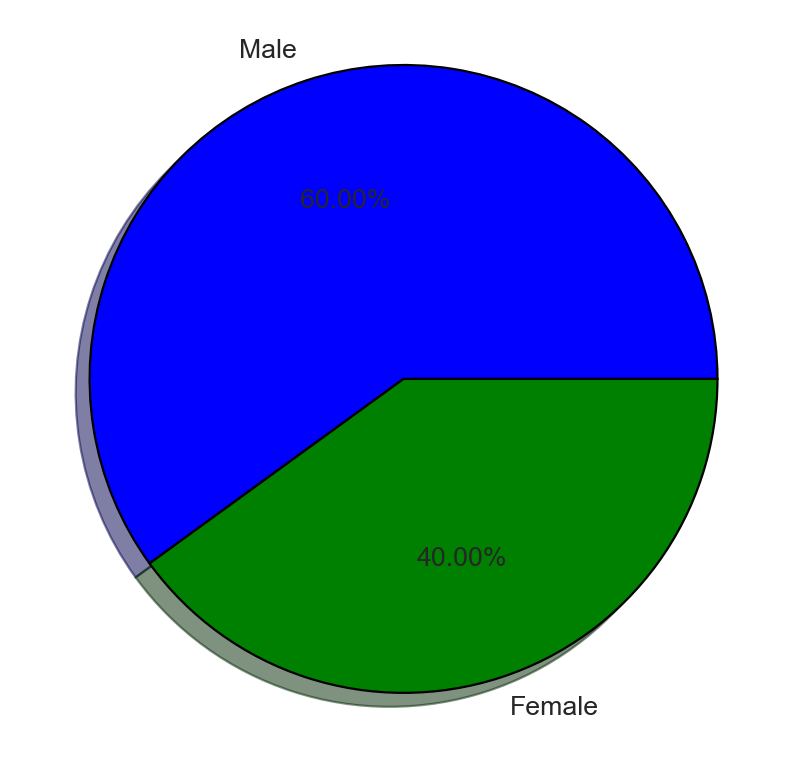

OverTime data percentage ->


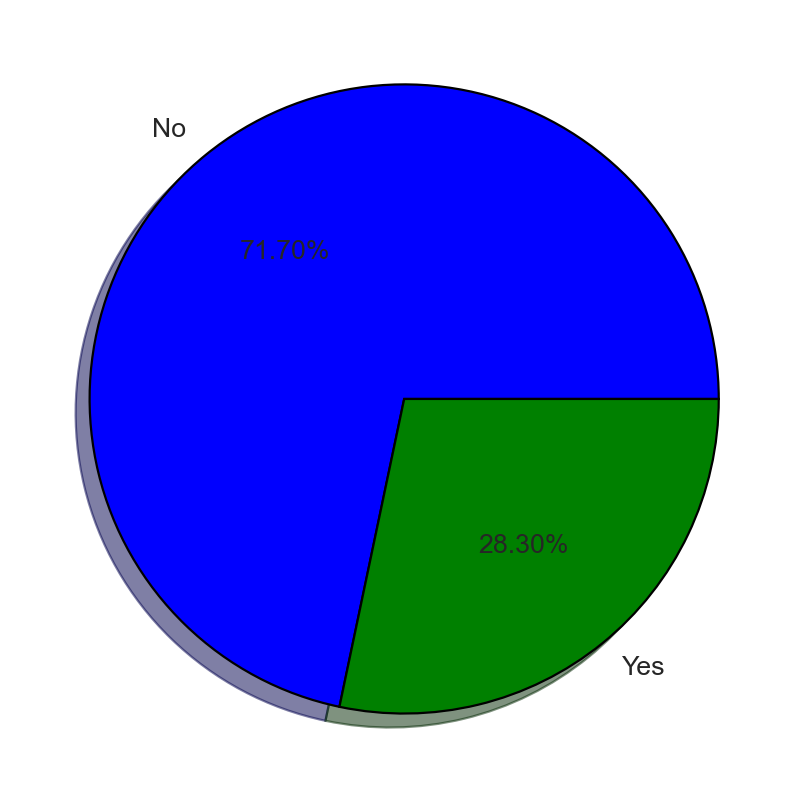

PerformanceRating data percentage ->


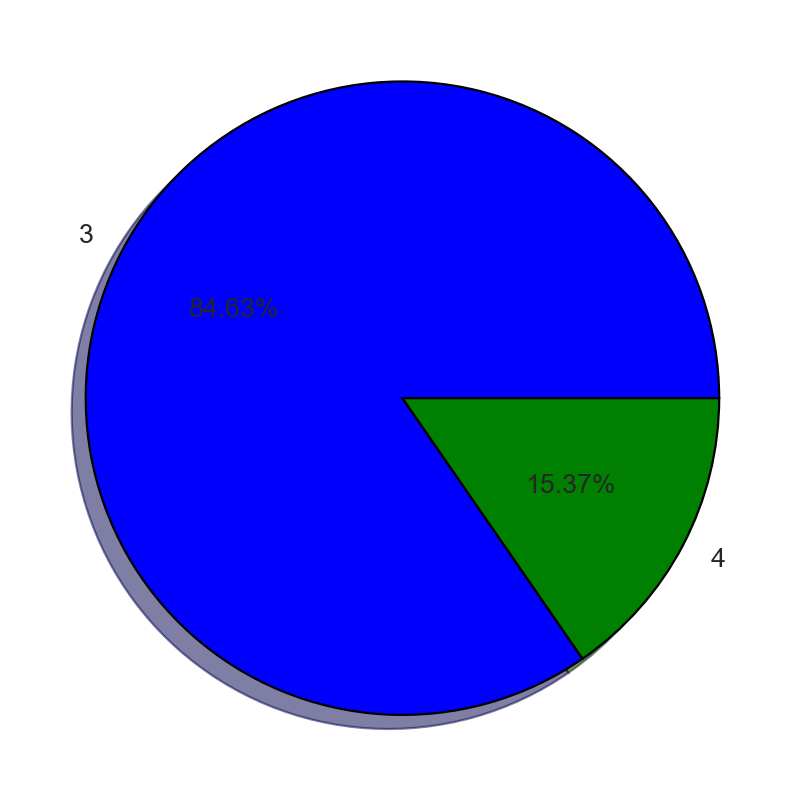

BusinessTravel data percentage ->


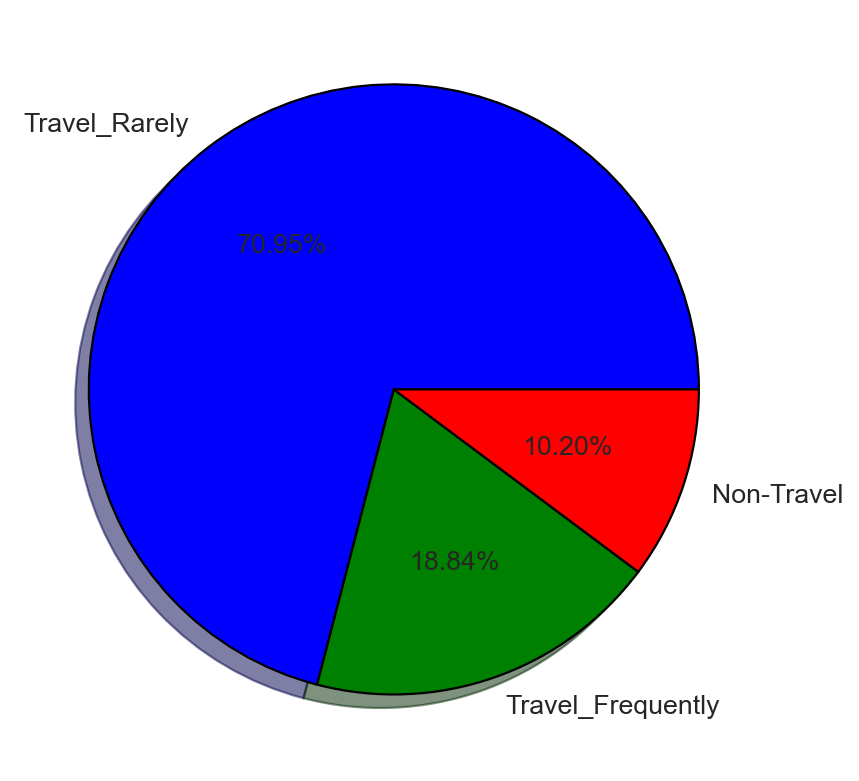

Department data percentage ->


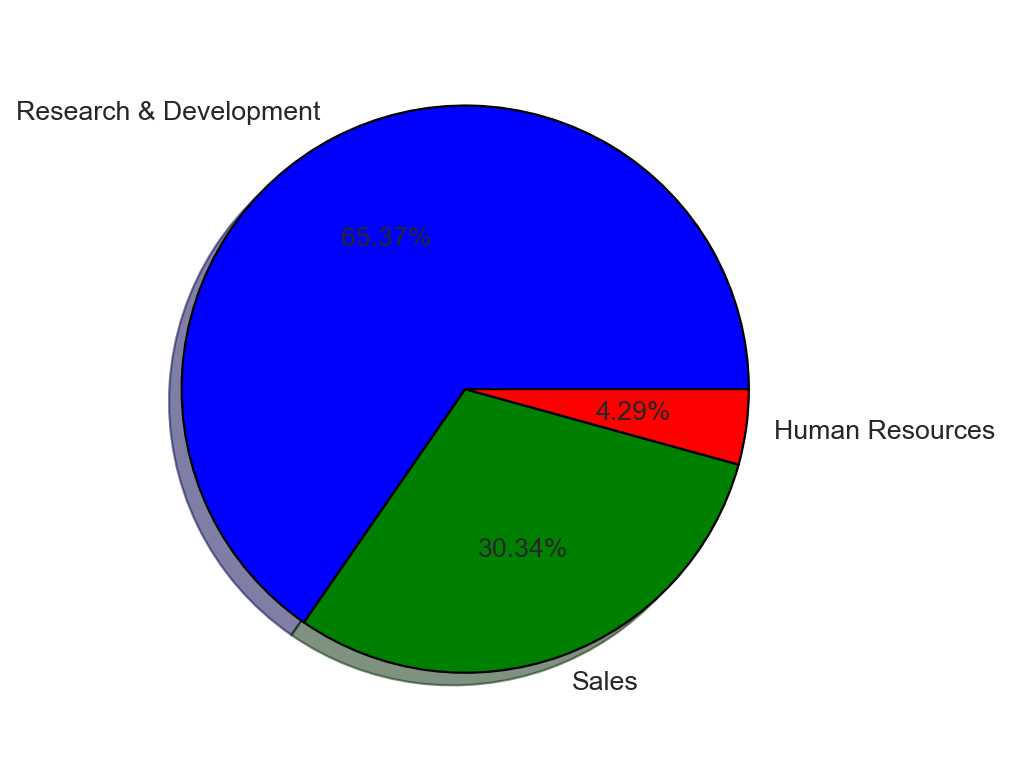

MaritalStatus data percentage ->


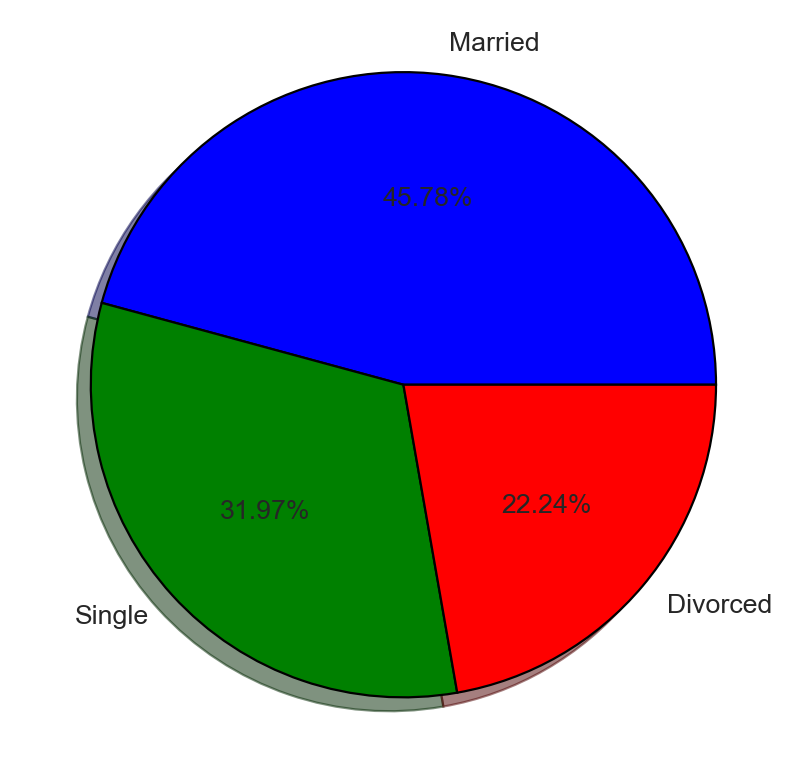

EnvironmentSatisfaction data percentage ->


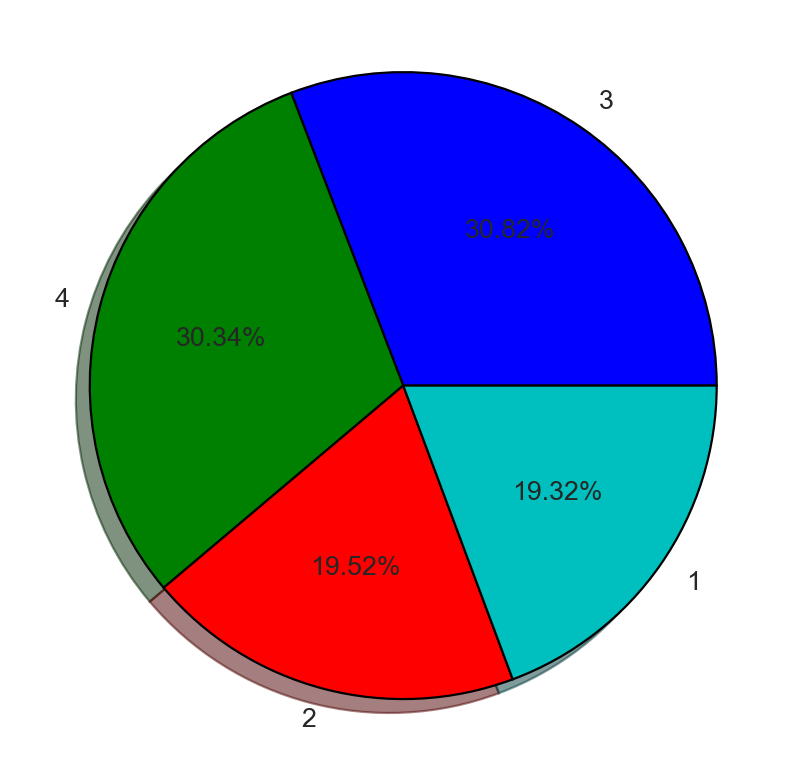

JobInvolvement data percentage ->


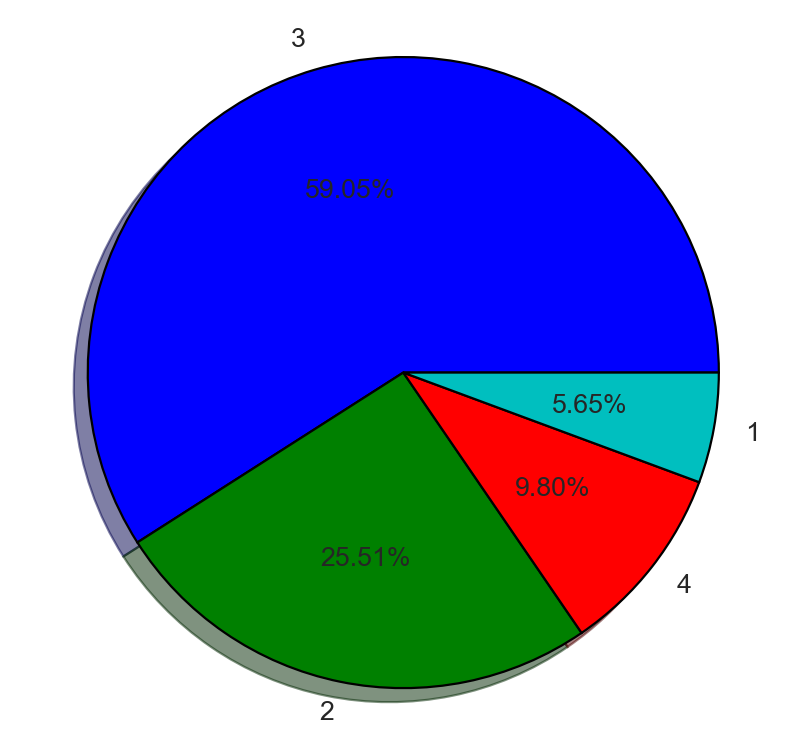

JobSatisfaction data percentage ->


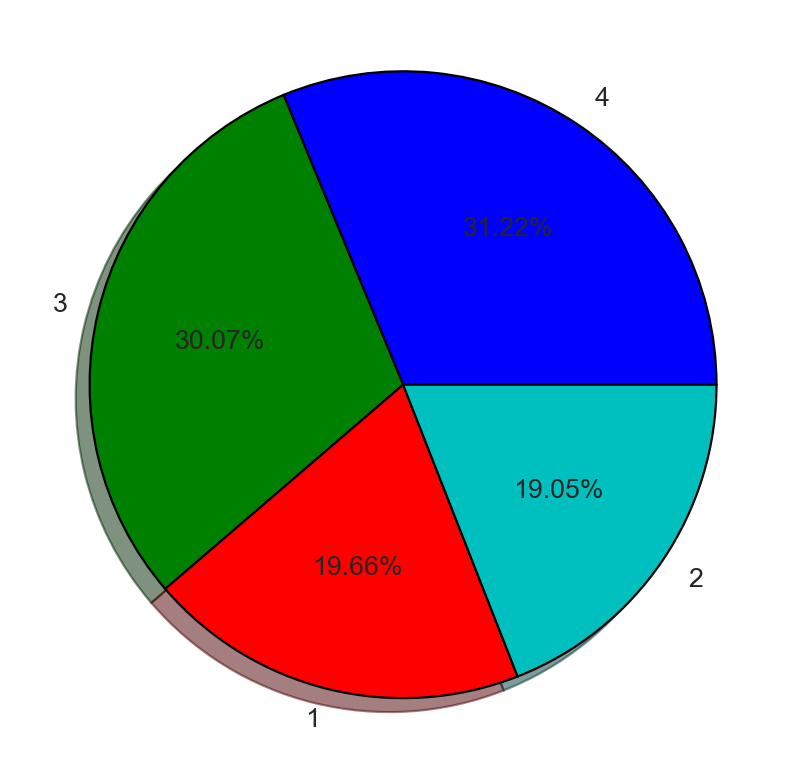

RelationshipSatisfaction data percentage ->


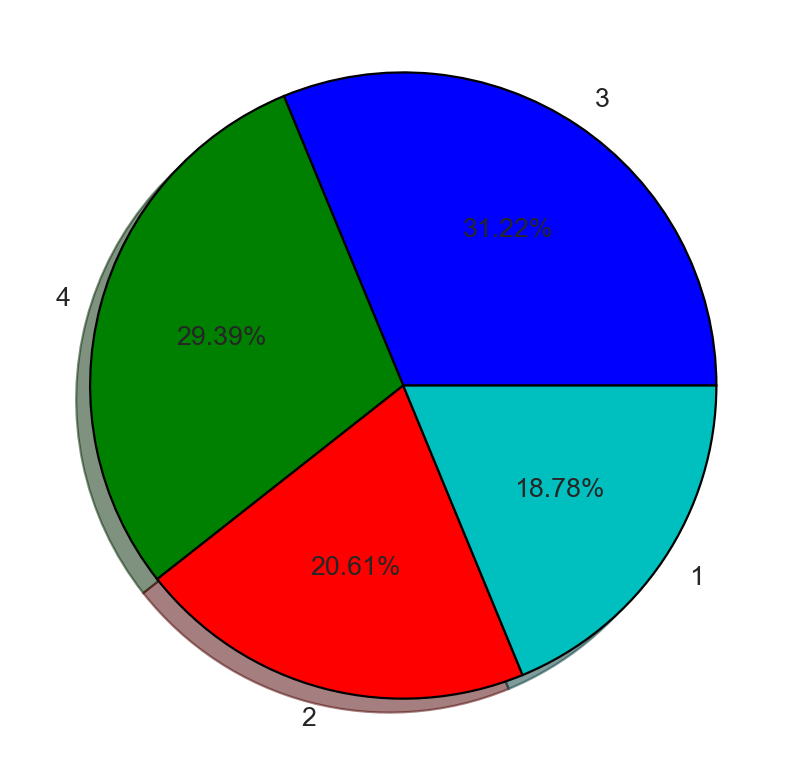

StockOptionLevel data percentage ->


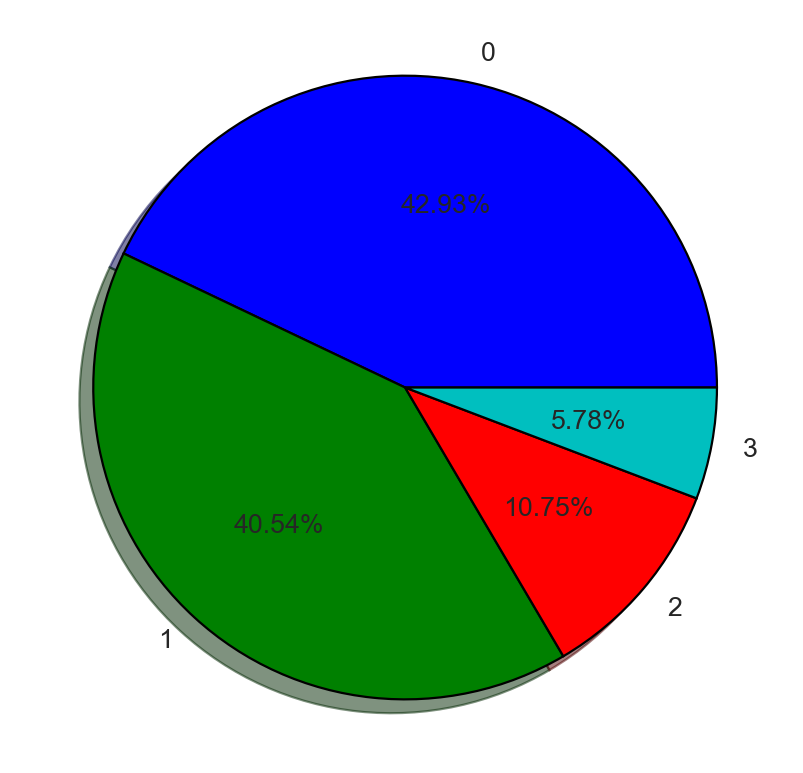

WorkLifeBalance data percentage ->


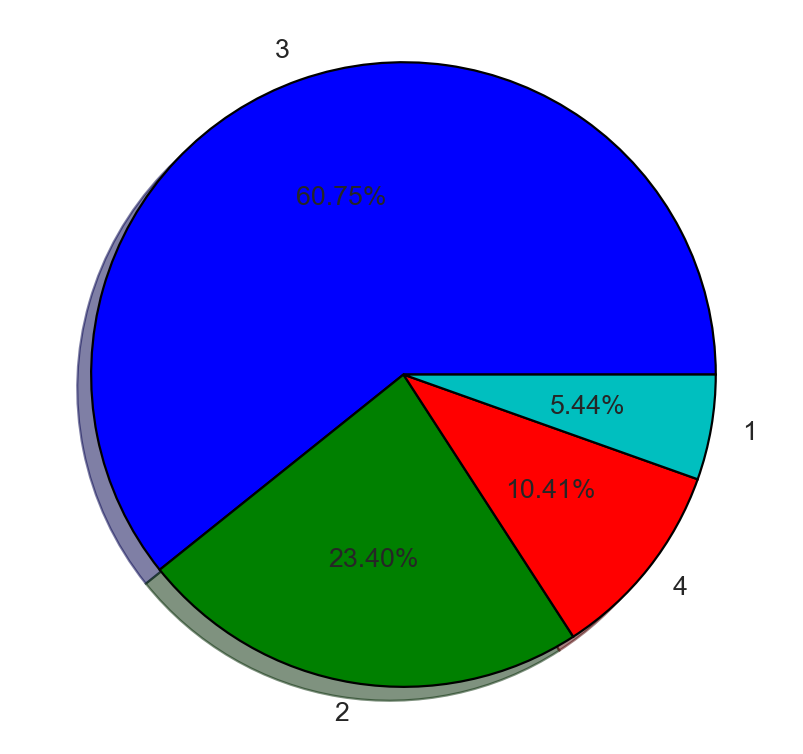

Education data percentage ->


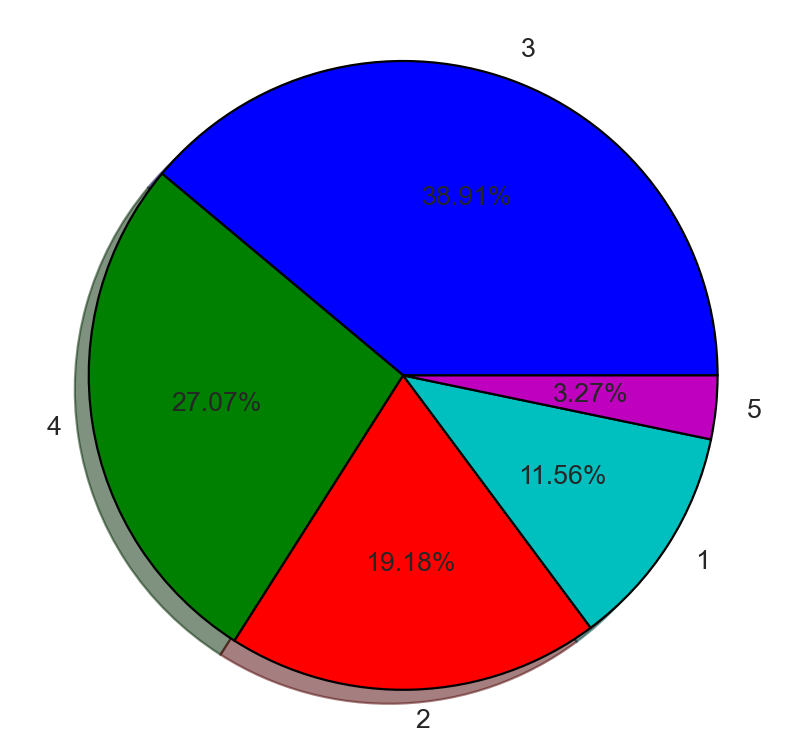

JobLevel data percentage ->


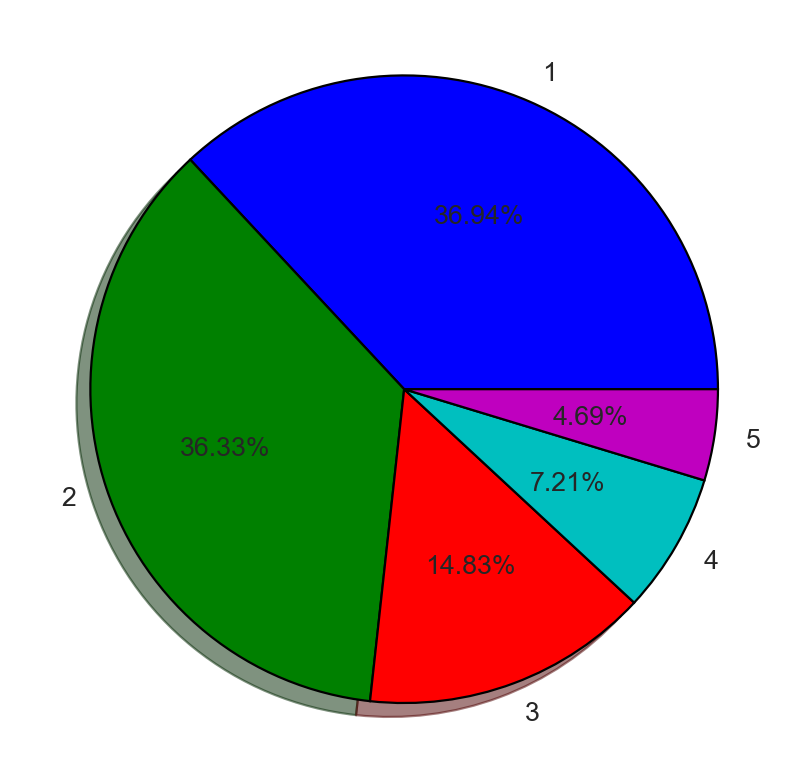

EducationField data percentage ->


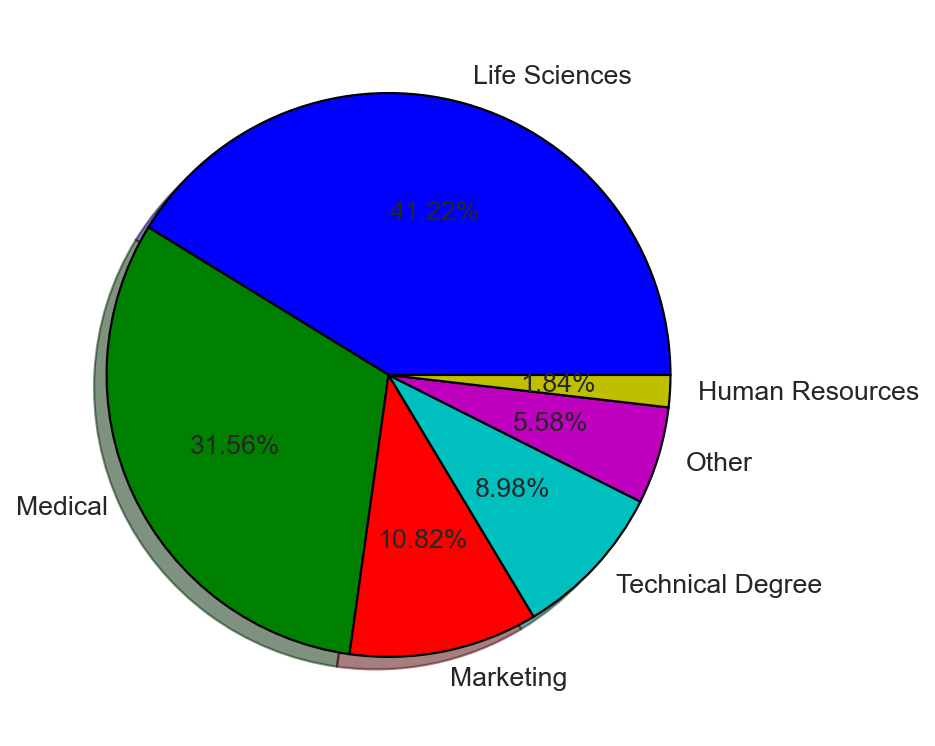

TrainingTimesLastYear data percentage ->


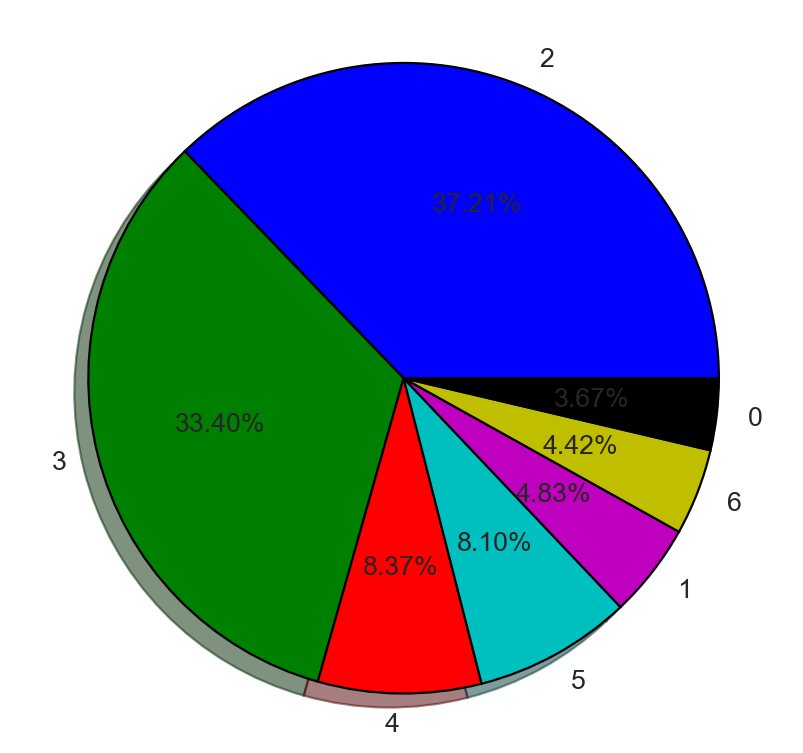

JobRole data percentage ->


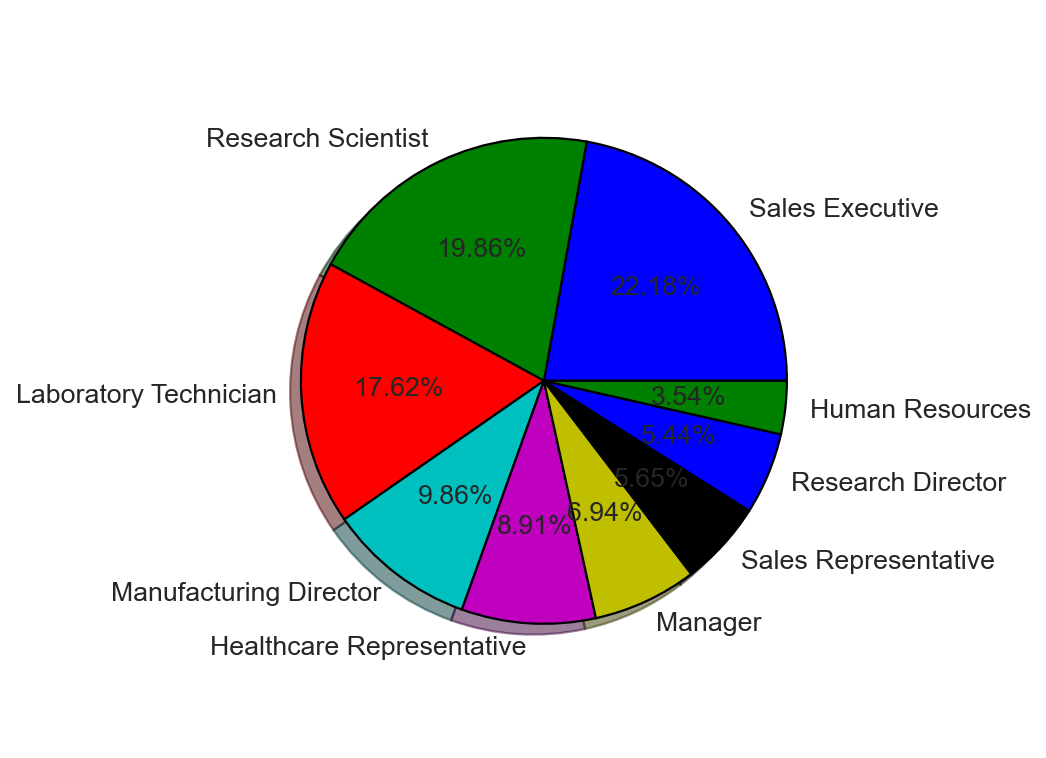

In [76]:
low_unique_val = ['Attrition', 'Gender', 'OverTime', 'PerformanceRating', 'BusinessTravel', 'Department', 
                  'MaritalStatus', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
                  'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'Education', 'JobLevel', 
                  'EducationField', 'TrainingTimesLastYear', 'JobRole']

def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,8))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.axis('equal')
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    return plt.show()

plt.style.use('classic')
for i in hra[low_unique_val]:
    print("{} data percentage ->".format(i))
    generate_pie(hra[i])
    
#the piechart representation gives a percentage of data for easier understanding and helps in taking decision.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='MonthlyRate'>

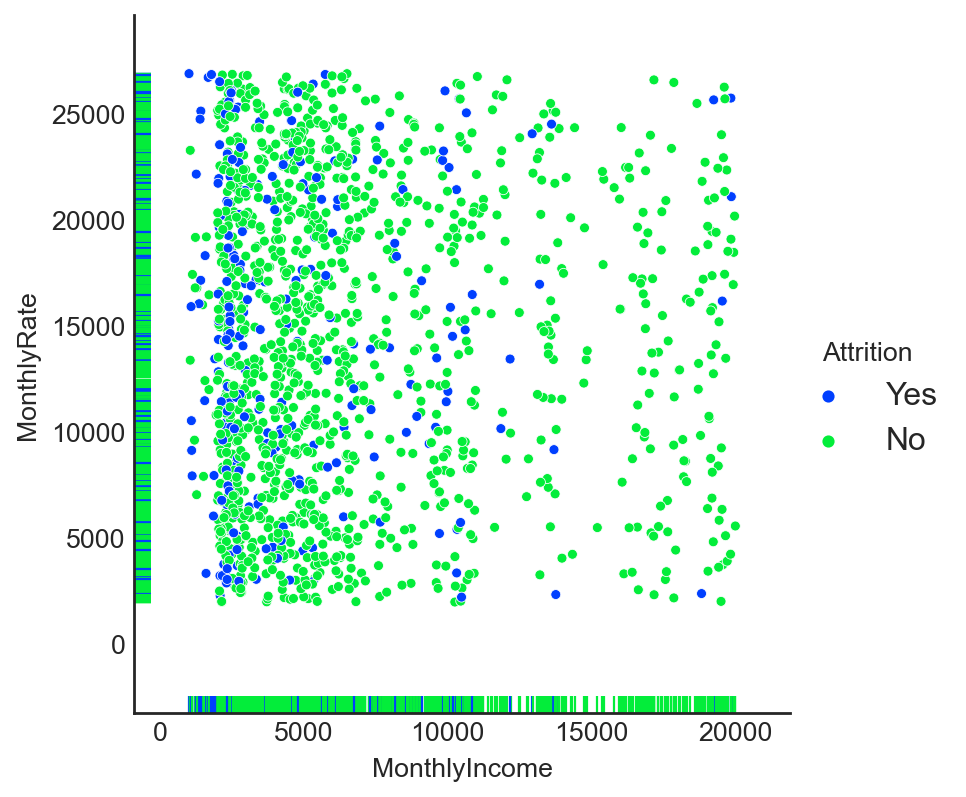

In [77]:
plt.style.use('seaborn-bright')

sns.relplot(data=hra, x='MonthlyIncome', y='MonthlyRate', hue='Attrition')
sns.rugplot(data=hra, x='MonthlyIncome', y='MonthlyRate', hue='Attrition', legend=False)


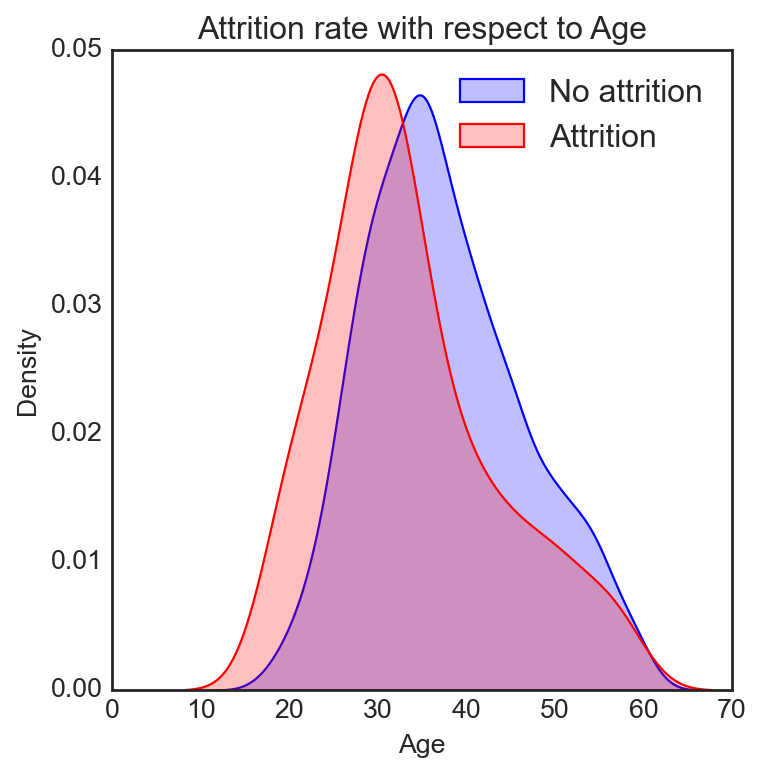

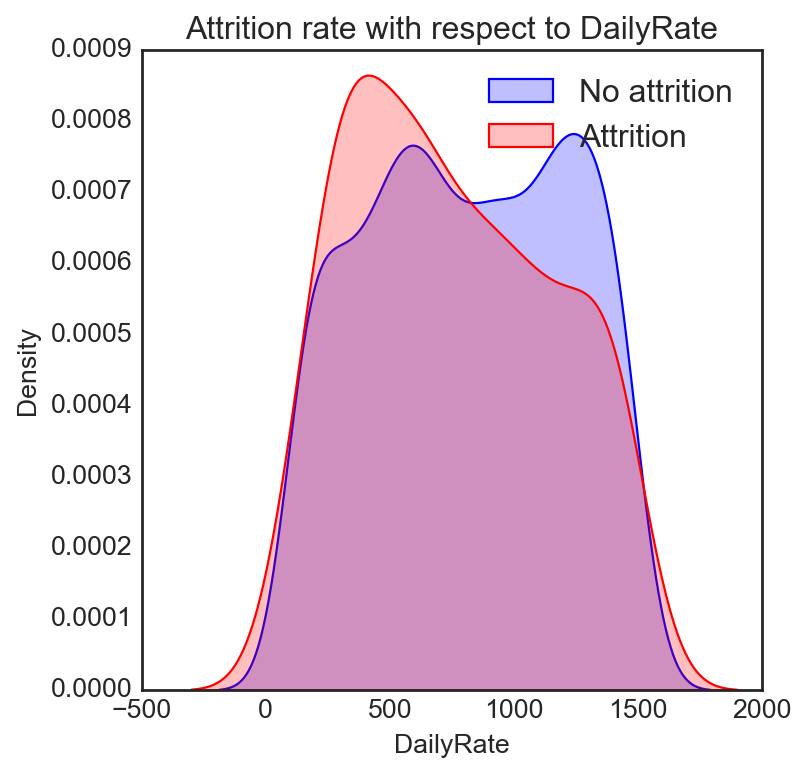

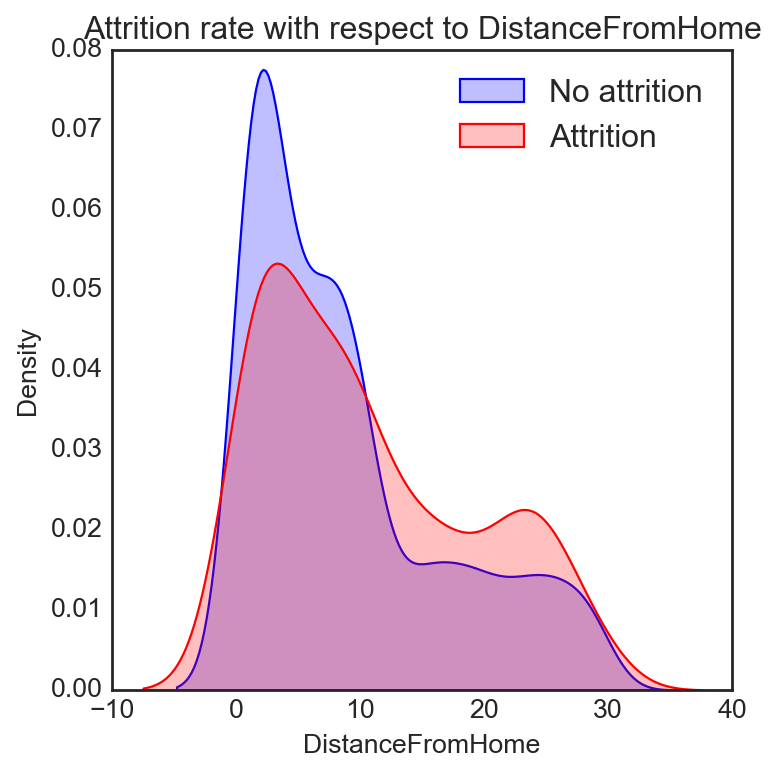

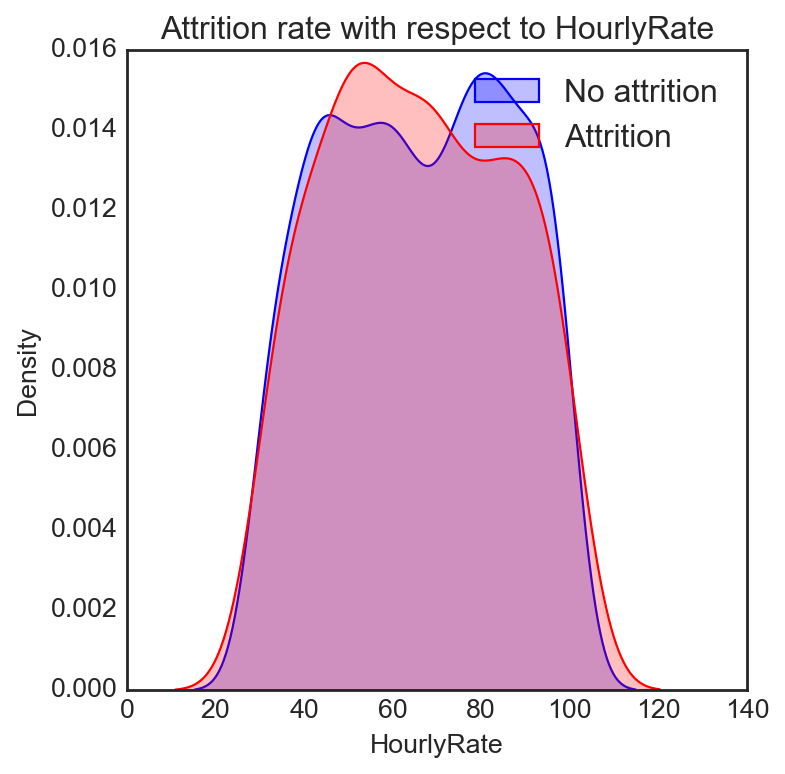

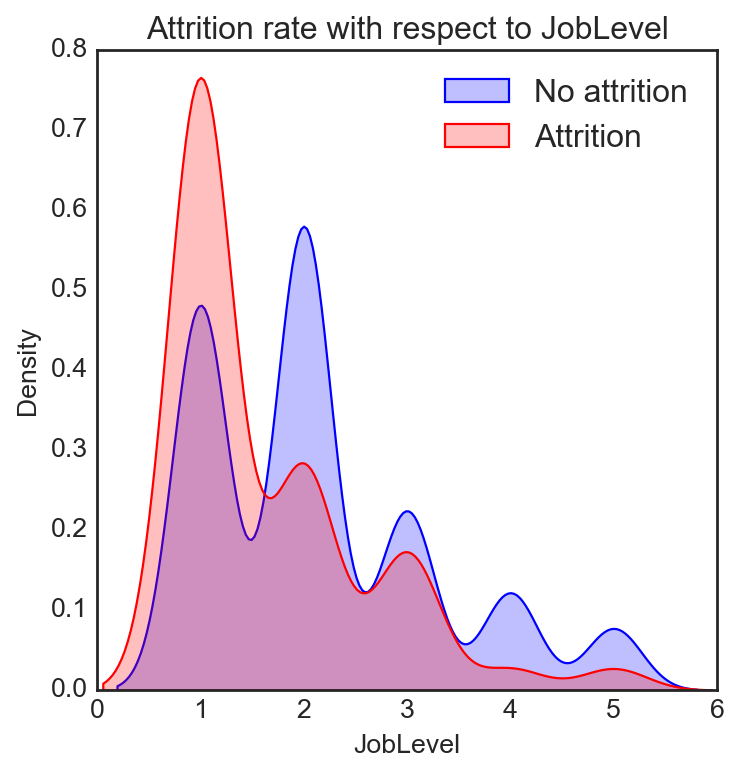

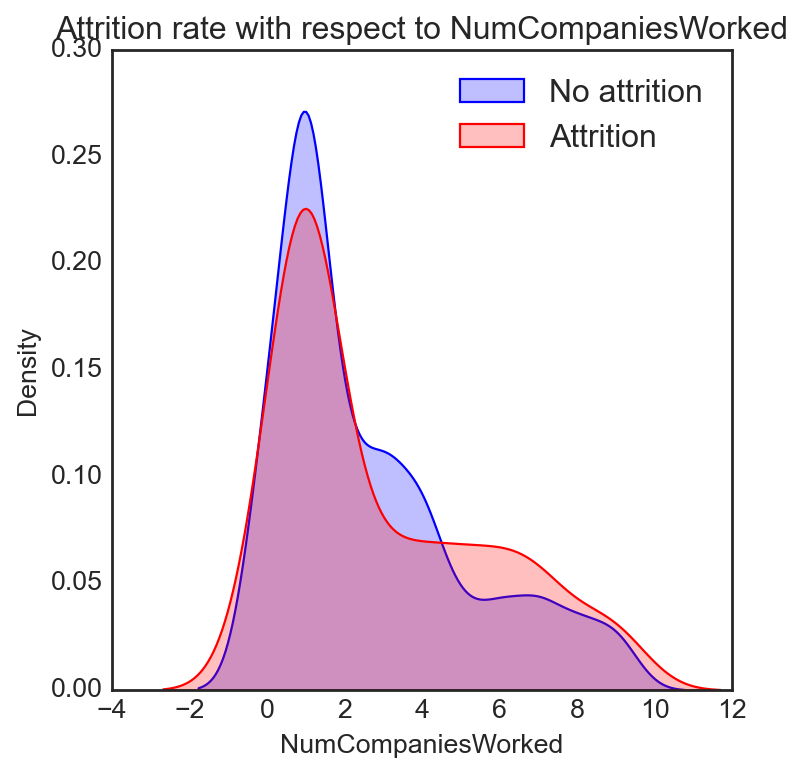

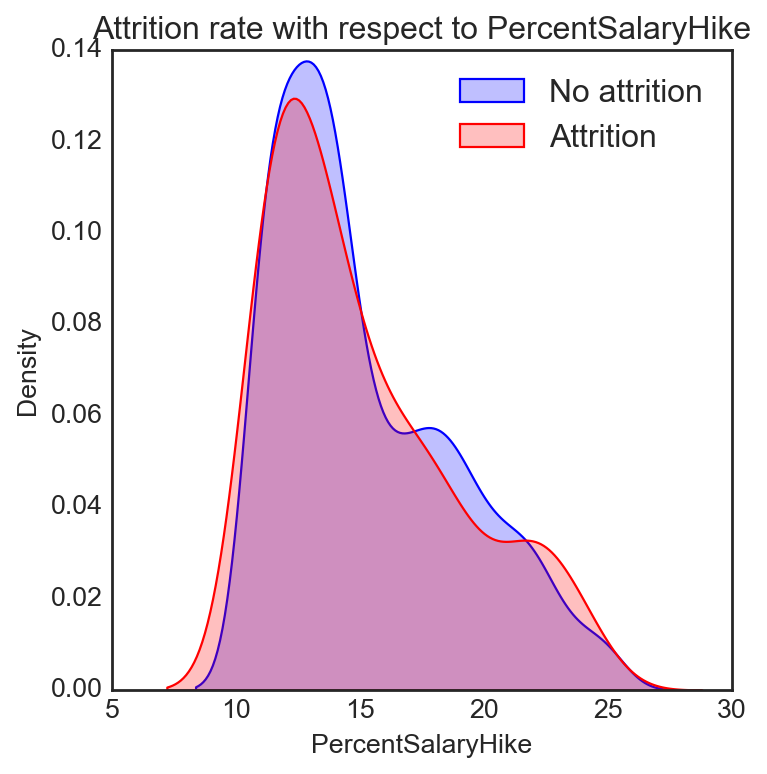

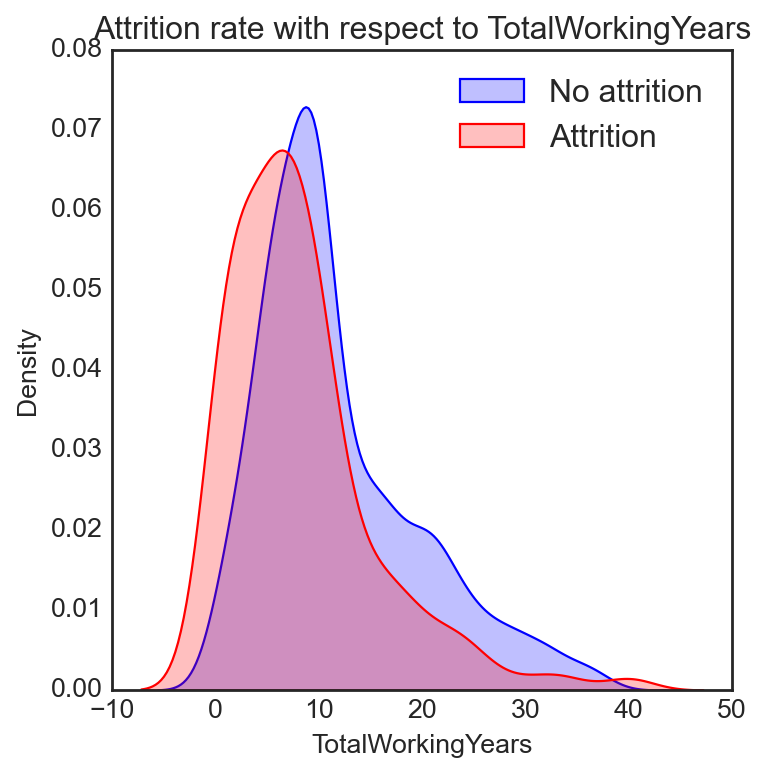

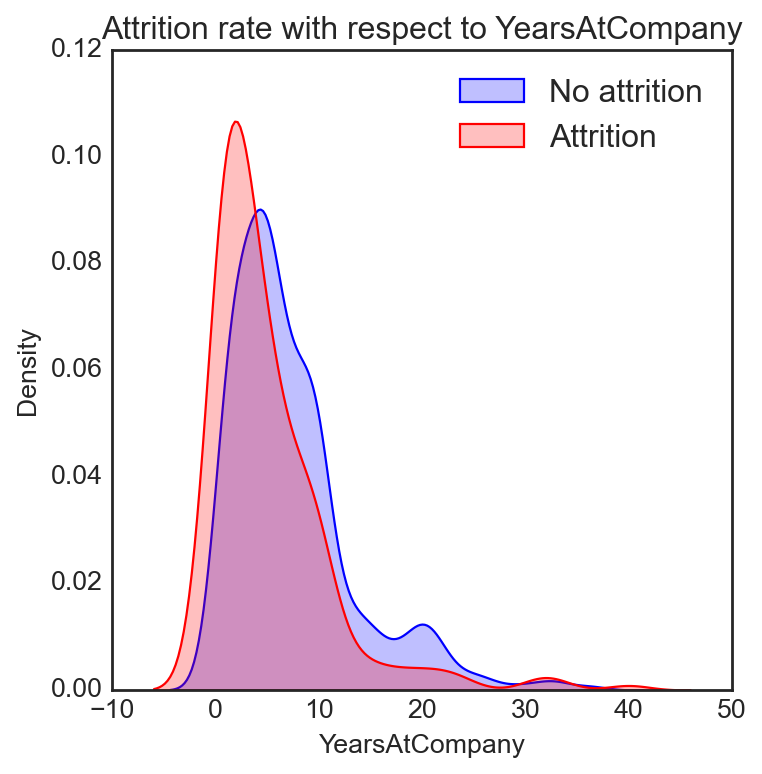

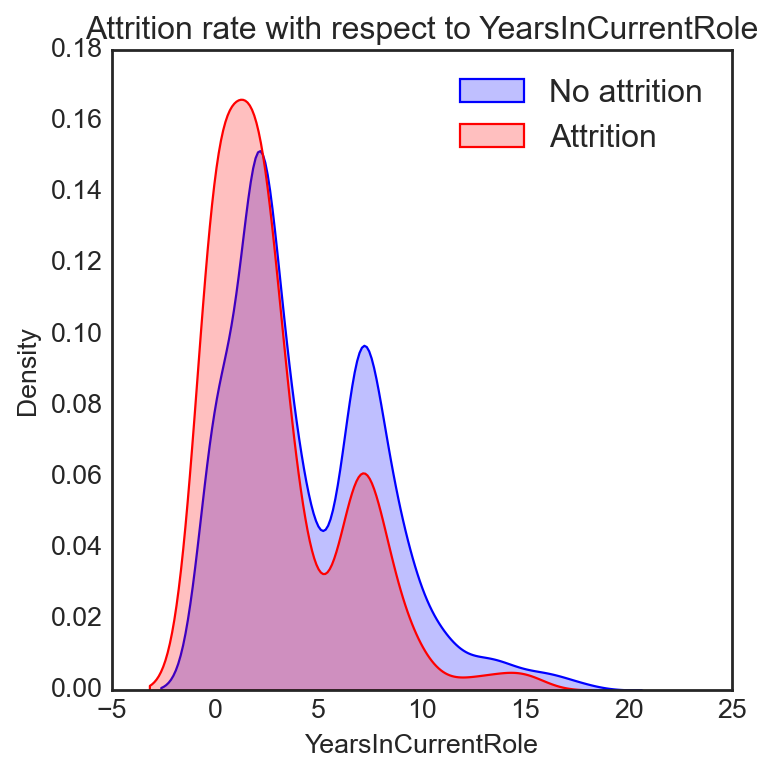

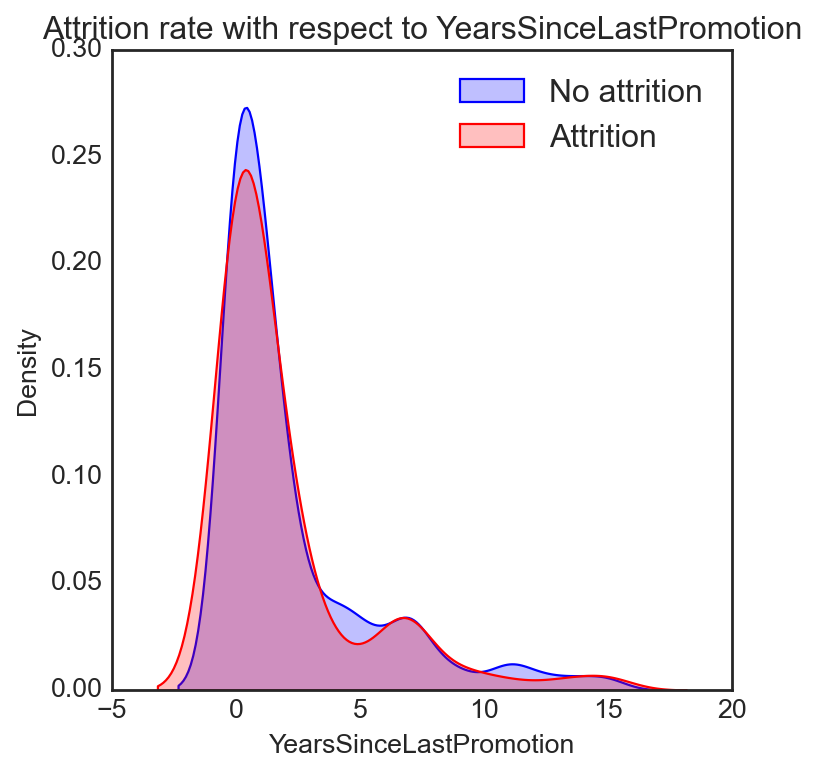

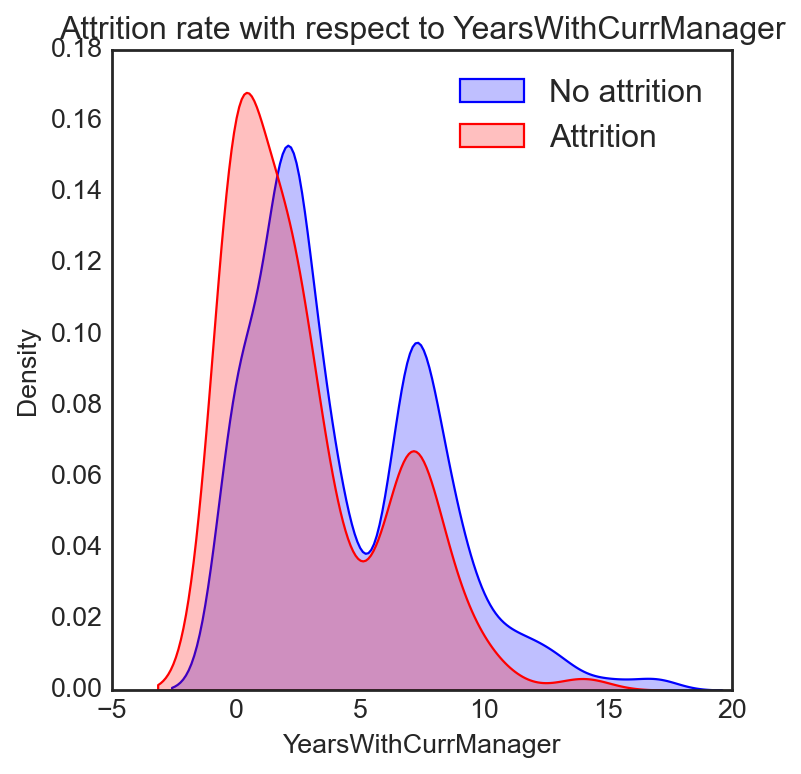

In [78]:
mul_val_col = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'NumCompaniesWorked', 
               'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

for z in hra[mul_val_col]:
    fig = plt.figure(figsize=(5,5))
    ax=sns.kdeplot(hra.loc[(hra['Attrition'] == 'No'), z], color='b', shade=True, label='No attrition') 
    ax=sns.kdeplot(hra.loc[(hra['Attrition'] == 'Yes'), z], color='r', shade=True, label='Attrition')
    plt.title('Attrition rate with respect to {}'.format(z))
    plt.legend()
    plt.show()
    
    #used KDEPLOT to show the comparisson of the data.

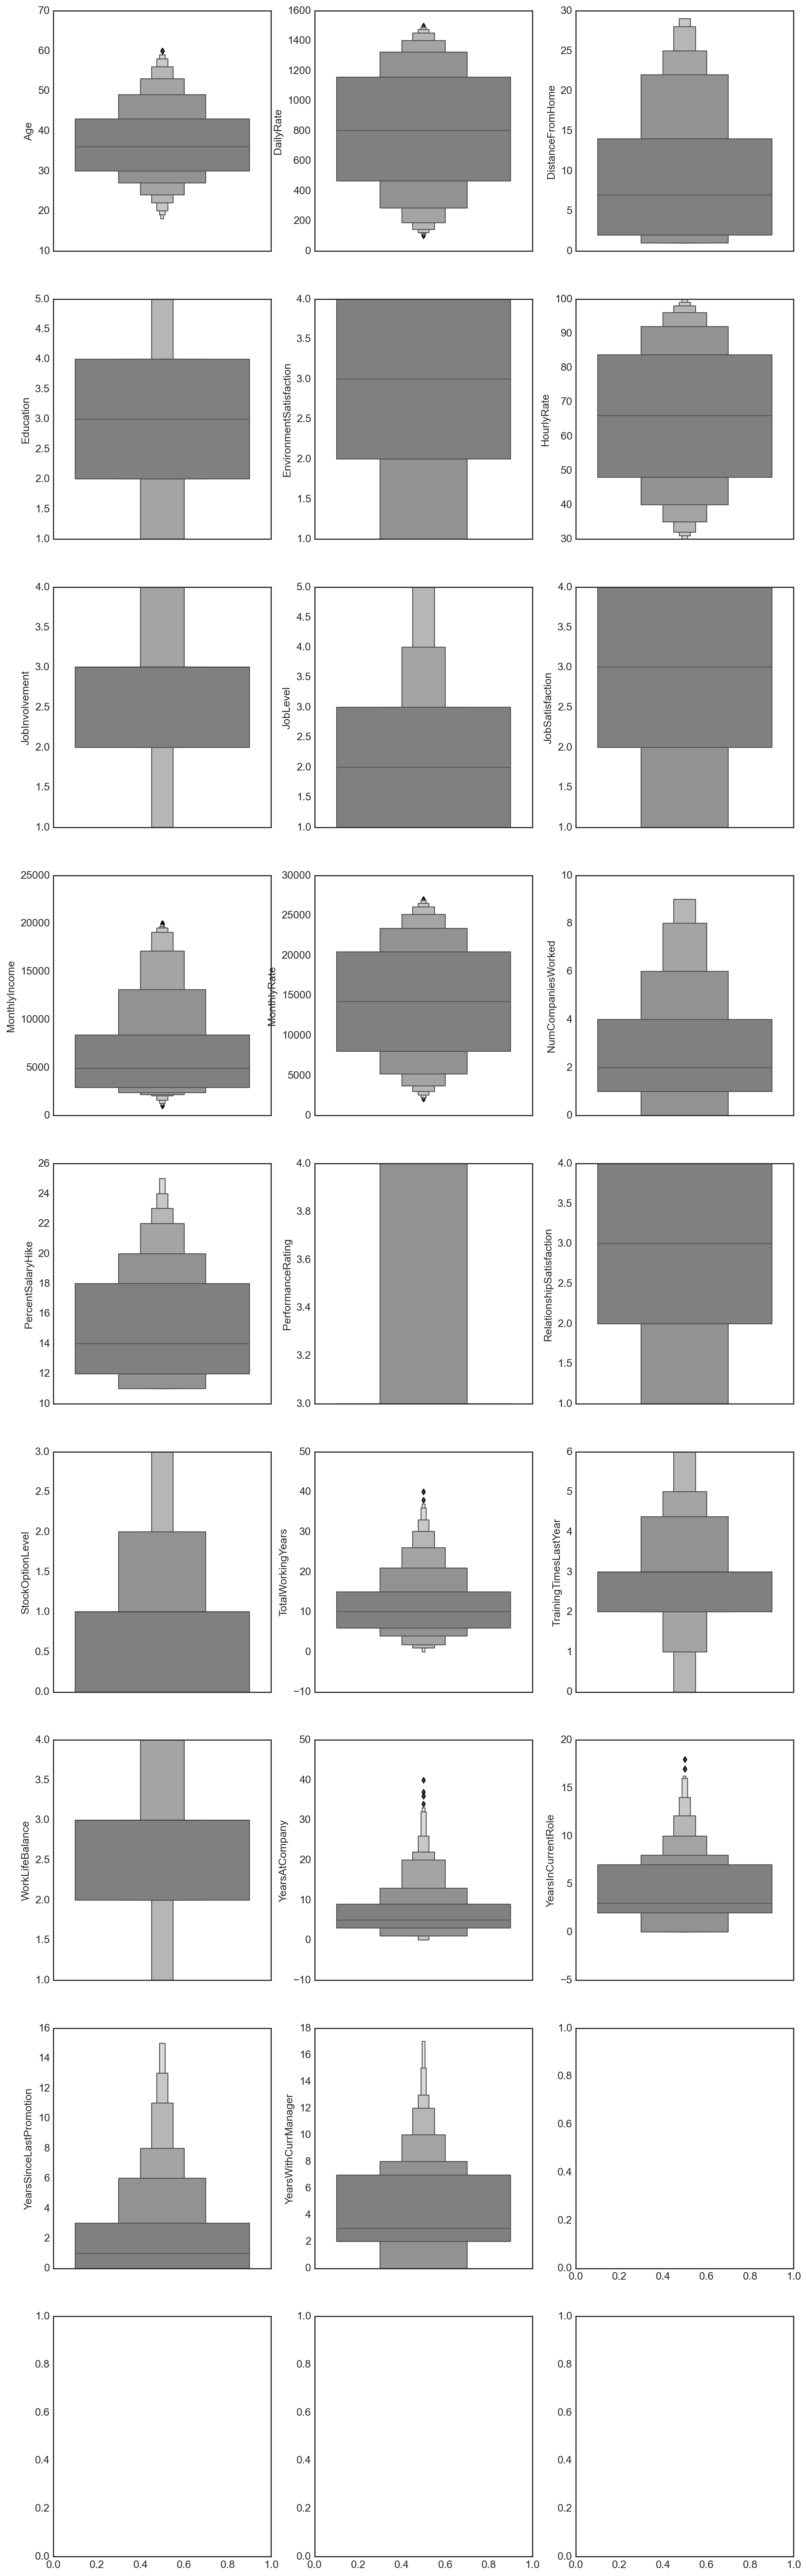

In [79]:
fig, ax = plt.subplots(ncols=3, nrows=9, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in hra[integer_datatype].items():
    sns.boxenplot(y=col, data=hra, ax=ax[index], color="grey")
    index += 1
plt.show()

#Created a box plot visual for all our integer datatype columns to check for outliers. 
#Some of the columns where there are presence of outliers and will need to treat it accordingly.

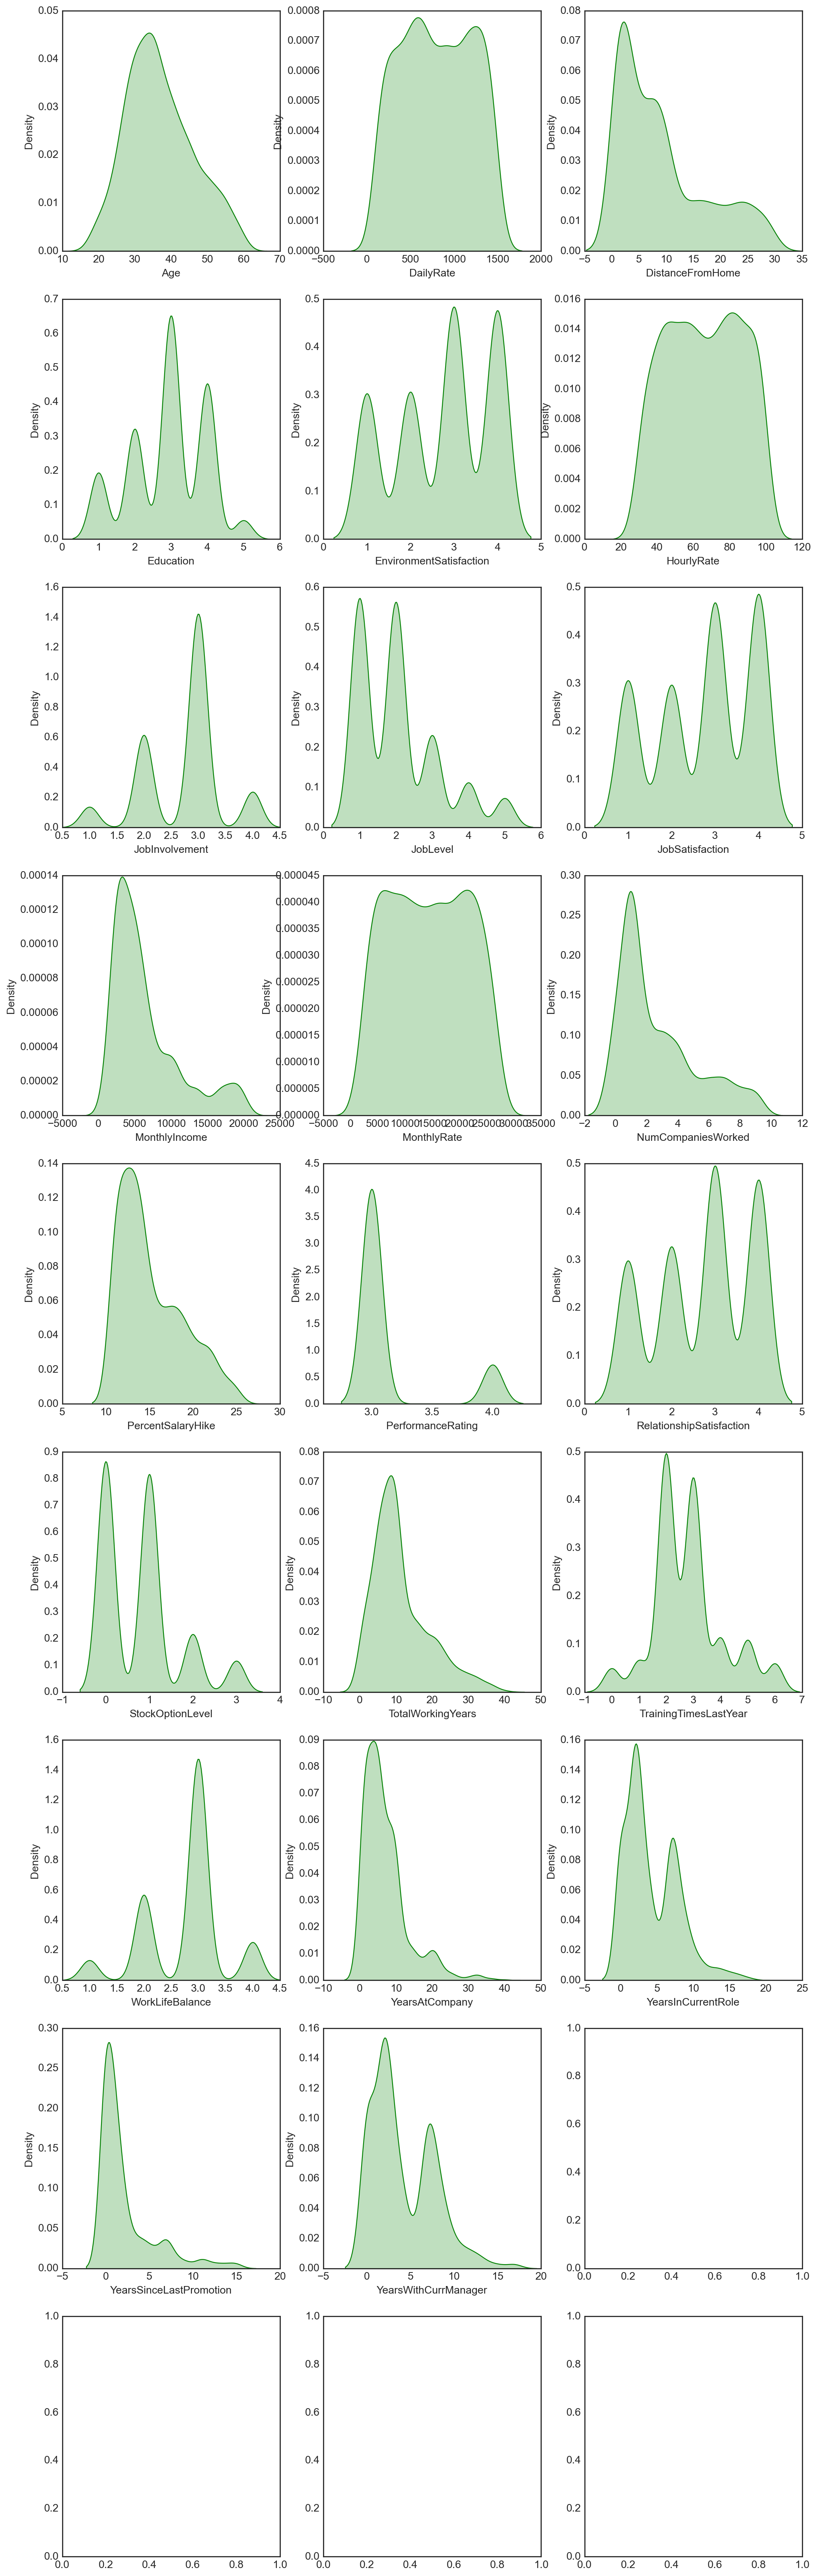

In [80]:
fig, ax = plt.subplots(ncols=3, nrows=9, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in hra[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.show()

#using distplot to find the skewness in the data and it visible in few columns the skewness is present.

# Encoding

In [81]:
# Label Encoding

le = LabelEncoder()
hra["Attrition"] = le.fit_transform(hra["Attrition"])
hra.head()

#using LabelEncoding form to convert the data object data type to numerical data type.

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [82]:
# Ordinal Encoding

oe = OrdinalEncoder()

def ordinal_encode(hra, column):
    hra[column] = oe.fit_transform(hra[column])
    return hra

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
hra=ordinal_encode(hra, oe_col)
hra.head()

#using oridinal encoding to convert the categorical object data type to integer data type.

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             2.0       1102         2.0                 1   
1   49          0             1.0        279         1.0                 8   
2   37          1             2.0       1373         1.0                 2   
3   33          0             1.0       1392         1.0                 3   
4   27          0             2.0        591         1.0                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2             1.0                        2     0.0  ...   
1          1             1.0                        3     1.0  ...   
2          2             4.0                        4     1.0  ...   
3          4             1.0                        4     0.0  ...   
4          1             3.0                        1     1.0  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [83]:
hra.head(10)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             2.0       1102         2.0                 1   
1   49          0             1.0        279         1.0                 8   
2   37          1             2.0       1373         1.0                 2   
3   33          0             1.0       1392         1.0                 3   
4   27          0             2.0        591         1.0                 2   
5   32          0             1.0       1005         1.0                 2   
6   59          0             2.0       1324         1.0                 3   
7   30          0             2.0       1358         1.0                24   
8   38          0             1.0        216         1.0                23   
9   36          0             2.0       1299         1.0                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2             1.0                        2     0.0  ...   
1          1             1.0                        3     1.0  ...   
2          2             4.0                        4     1.0  ...   
3          4             1.0                        4     0.0  ...   
4          1             3.0                        1     1.0  ...   
5          2             1.0                        4     1.0  ...   
6          3             3.0                        3     0.0  ...   
7          1             1.0                        4     1.0  ...   
8          3             1.0                        4     1.0  ...   
9          3             3.0                        3     1.0  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   
5                  3                         3                 0   
6                  4                         1                 3   
7                  4                         2                 1   
8                  4                         2                 0   
9                  3                         2                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7            

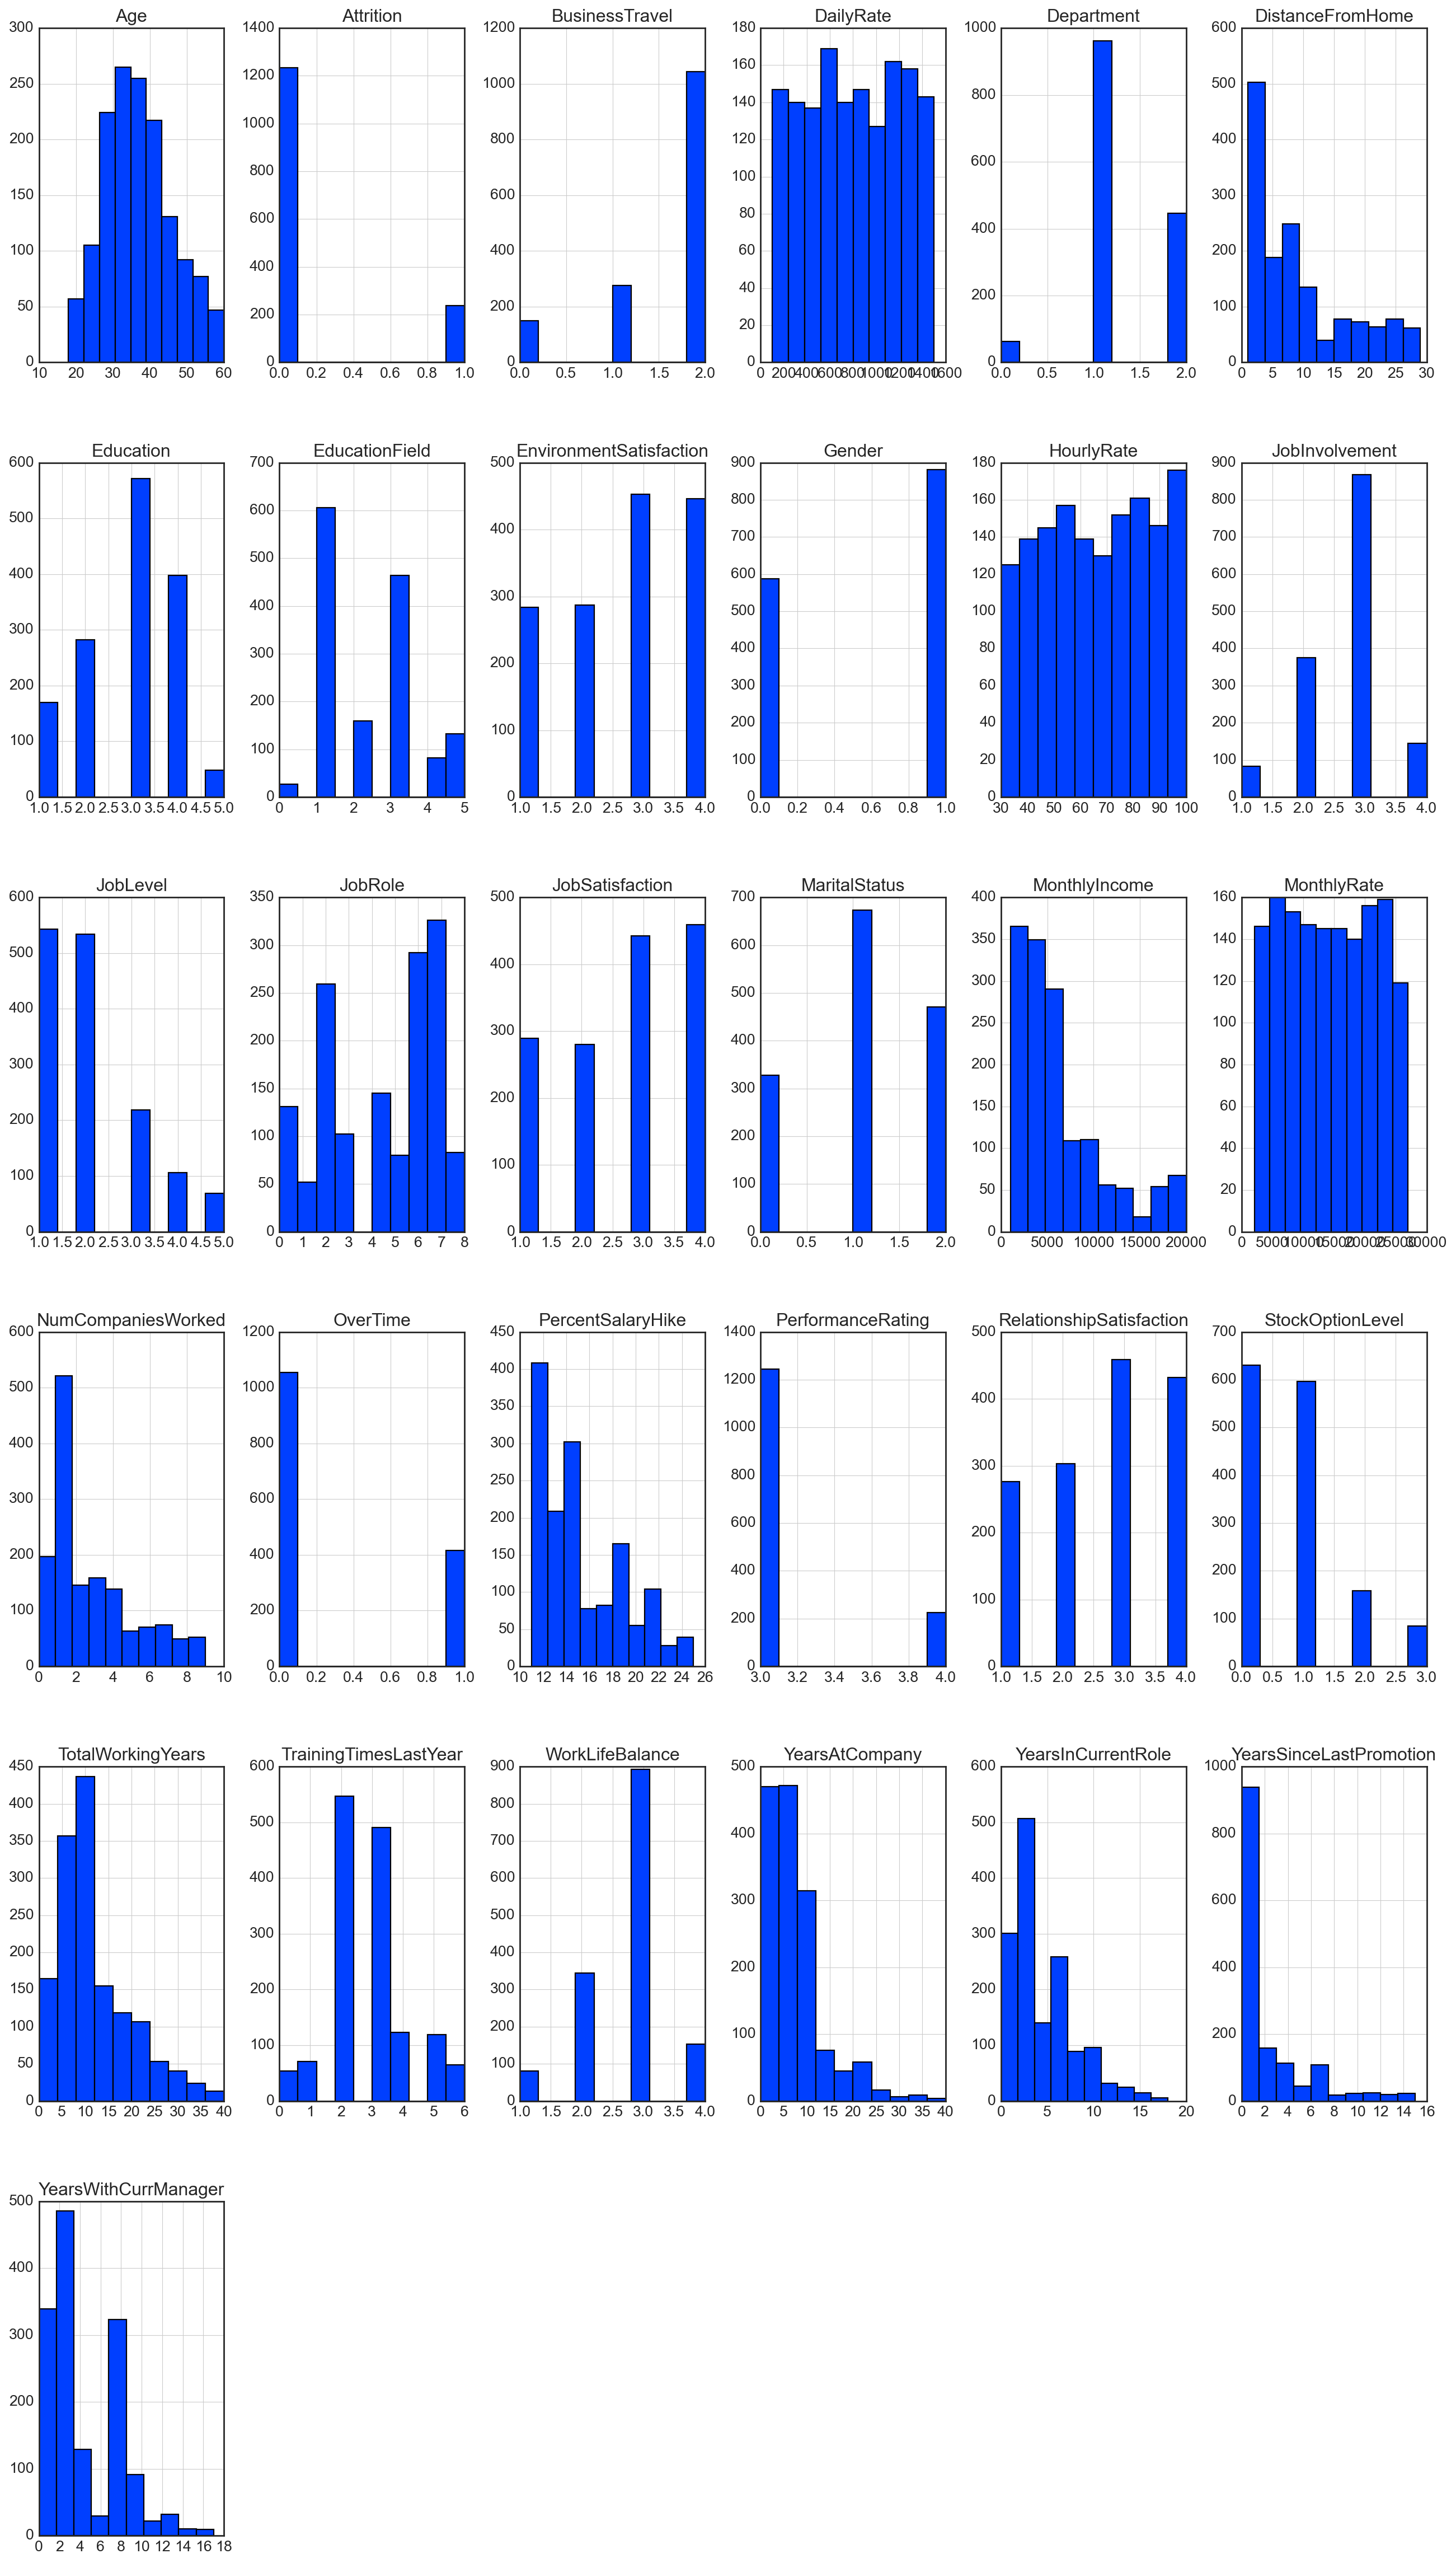

In [84]:
hra.hist(figsize=(20,35))
plt.show()

#using histogram to check for the data post encoding.

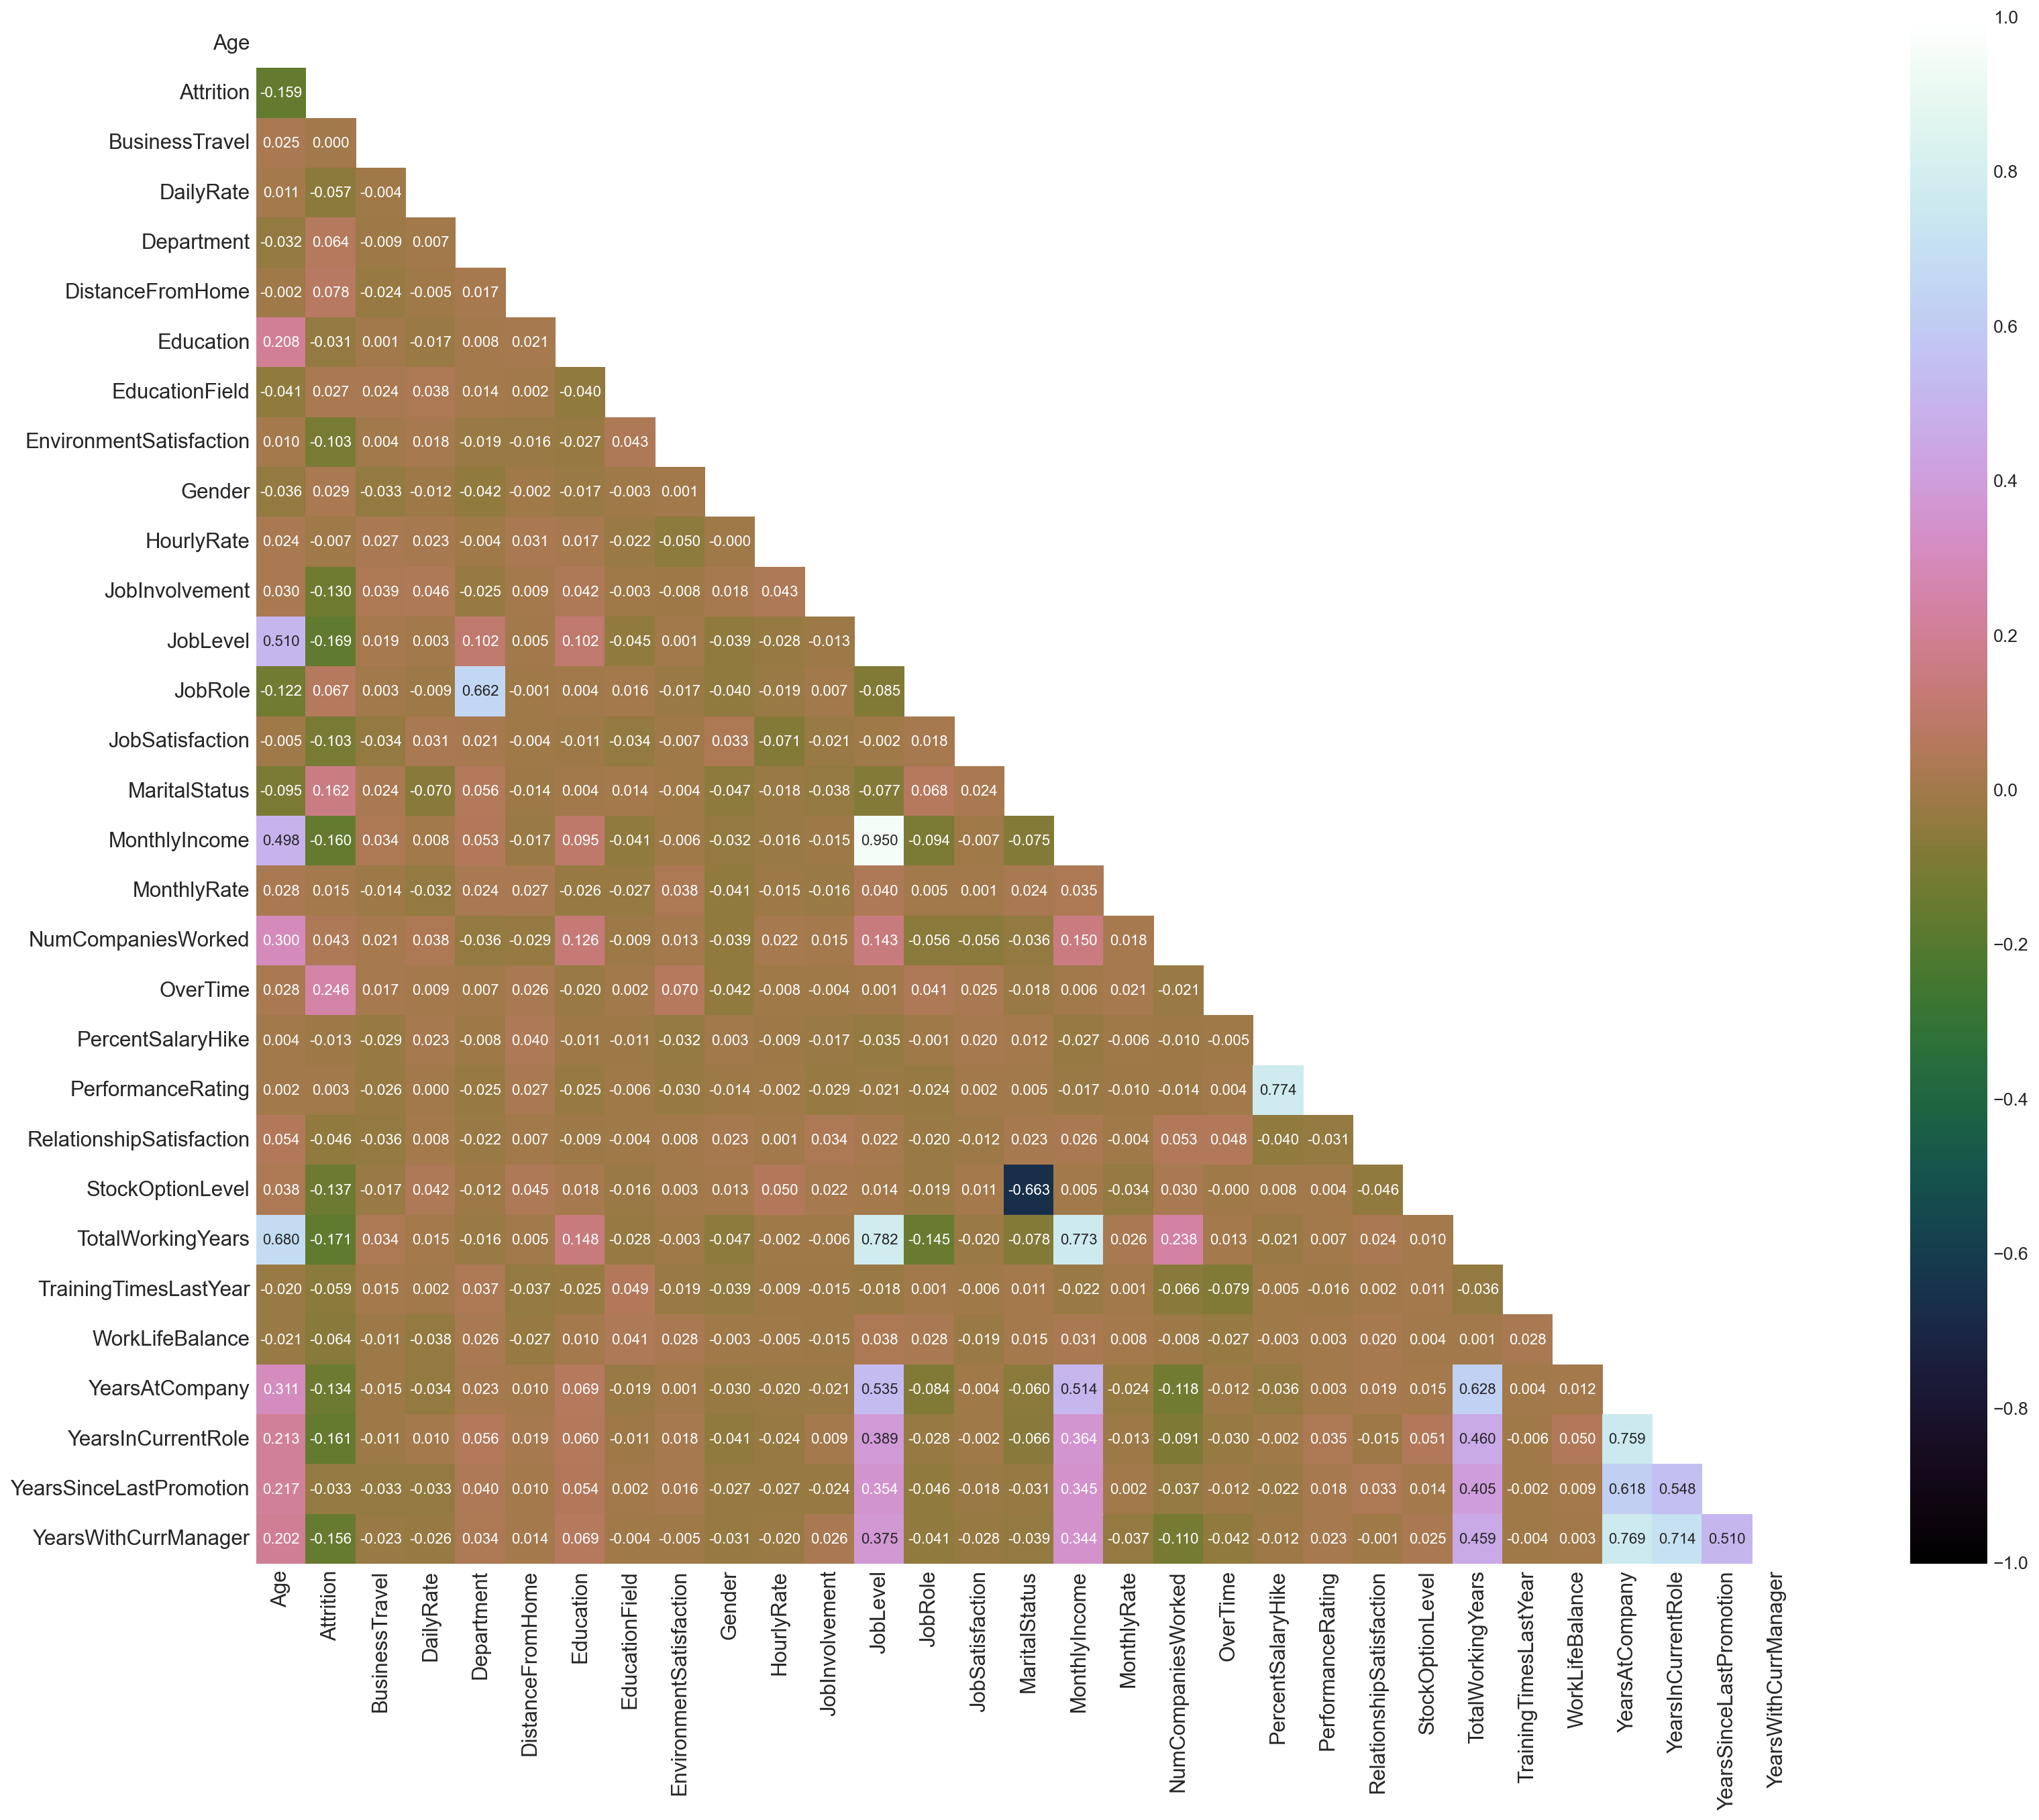

In [85]:
upper_triangle = np.triu(hra.corr())
plt.figure(figsize=(26,18))
sns.heatmap(hra.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#heatmap showstarget variable "Attrition" has both positive and negative correlations with the Particular columns. 
#Also very less or negligible amount of multi collinearity so we will not have to worry about it. 
#Since the one's which are reflecting the value are inter dependent on those Particular columns and intend to retain and keep them.

# Correlation Bar Plot comparing Particulars with label

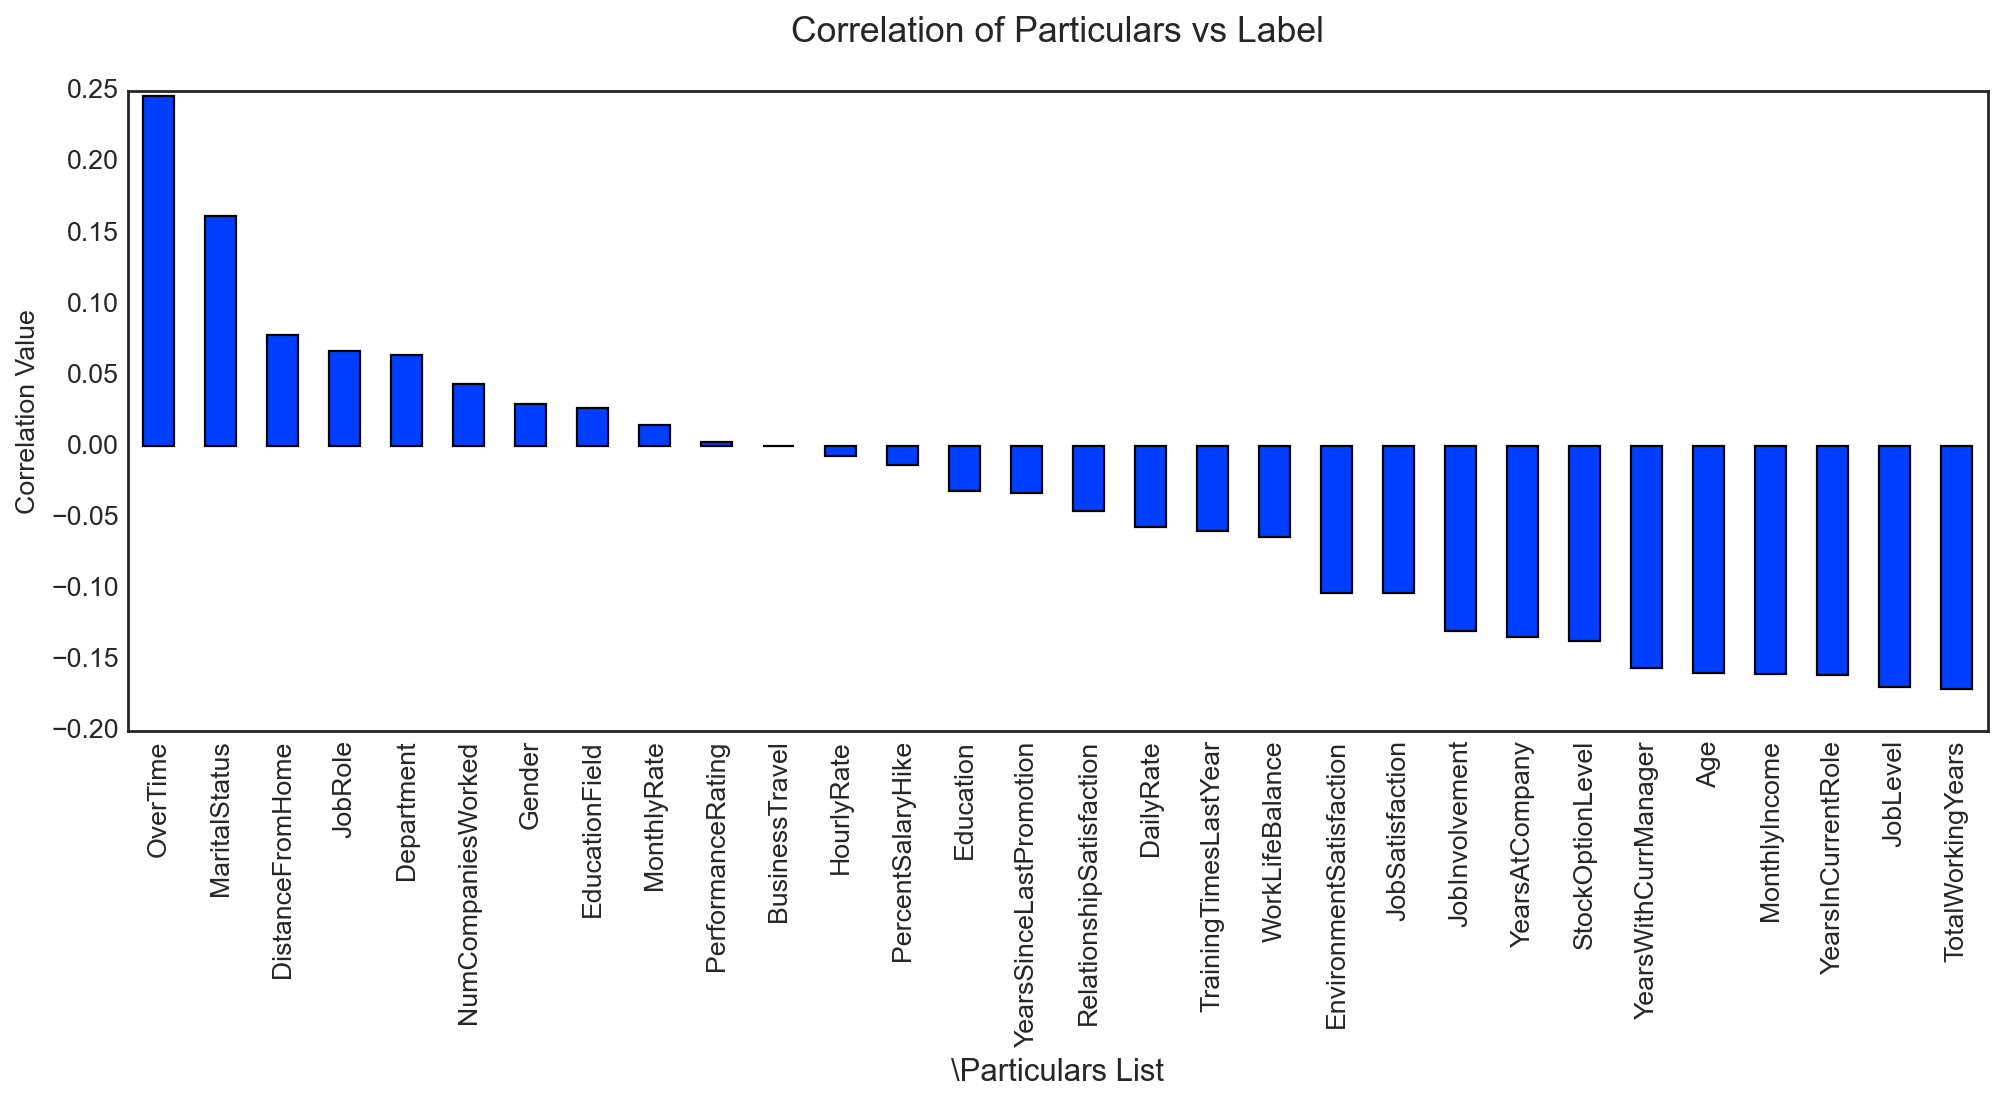

In [86]:
hra_corr = hra.corr()
plt.figure(figsize=(15,5))
hra_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Particulars vs Label\n", fontsize=16)
plt.xlabel("\Particulars List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#the below result shows the positive and negative correlation data.

# Using Z Score to remove outliers

In [87]:
z = np.abs(zscore(hra))
threshold = 3
hra1 = hra[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", hra.shape)
print ("Shape of the dataframe after removing outliers: ", hra1.shape)
print ("Percentage of data loss post outlier removal: ", (hra.shape[0]-hra1.shape[0])/hra.shape[0]*100)

hra=hra1.copy() # reassigning the changed dataframe name to our original dataframe name

#used ZScore method to remove the Outliers.

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


In [88]:
#using skew method to find columns skewness within acceptable range or not (acceptable range = +/-0.5)

hra.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [89]:
#Fixing Skewness by using Log Transformation

In [90]:
for col in integer_datatype:
    if hra.skew().loc[col]>0.55:
        hra[col]=np.log1p(hra[col])

# Splitting the dataset into 2 variables namely 'X' and 'Y' for Particular and label

In [91]:
X = hra.drop('Attrition', axis=1)
Y = hra['Attrition']

In [92]:
Y.value_counts() #the below result shows there is a imbalance in the data.

0    1158
1     229
Name: Attrition, dtype: int64

In [93]:
#using SMOTE code to solve imbalance in the data.
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [94]:
Y.value_counts() #now the imbalance is solved.

0    1158
1    1158
Name: Attrition, dtype: int64

# Finding best random state for building Regression Models

In [95]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 82.55613126079447 on Random State 640


In [96]:
#Training and testing data sets

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=591)

# Importance of Bar Graph

Importance
Particulars                         
OverTime                       0.158
StockOptionLevel               0.080
JobLevel                       0.061
MaritalStatus                  0.051
JobSatisfaction                0.037
YearsWithCurrManager           0.035
JobInvolvement                 0.035
Department                     0.034
YearsInCurrentRole             0.033
YearsAtCompany                 0.032
TotalWorkingYears              0.031
MonthlyIncome                  0.030
DistanceFromHome               0.029
DailyRate                      0.027
MonthlyRate                    0.027
EnvironmentSatisfaction        0.027
Age                            0.026
NumCompaniesWorked             0.026
HourlyRate                     0.025
JobRole                        0.025
TrainingTimesLastYear          0.023
RelationshipSatisfaction       0.022
Gender                         0.021
PercentSalaryHike              0.020
BusinessTravel                 0.020
EducationField                 0.018
YearsSinceLastPromotion        0.017
WorkLifeBalance                0.015
Education                      0.012
PerformanceRating              0.007

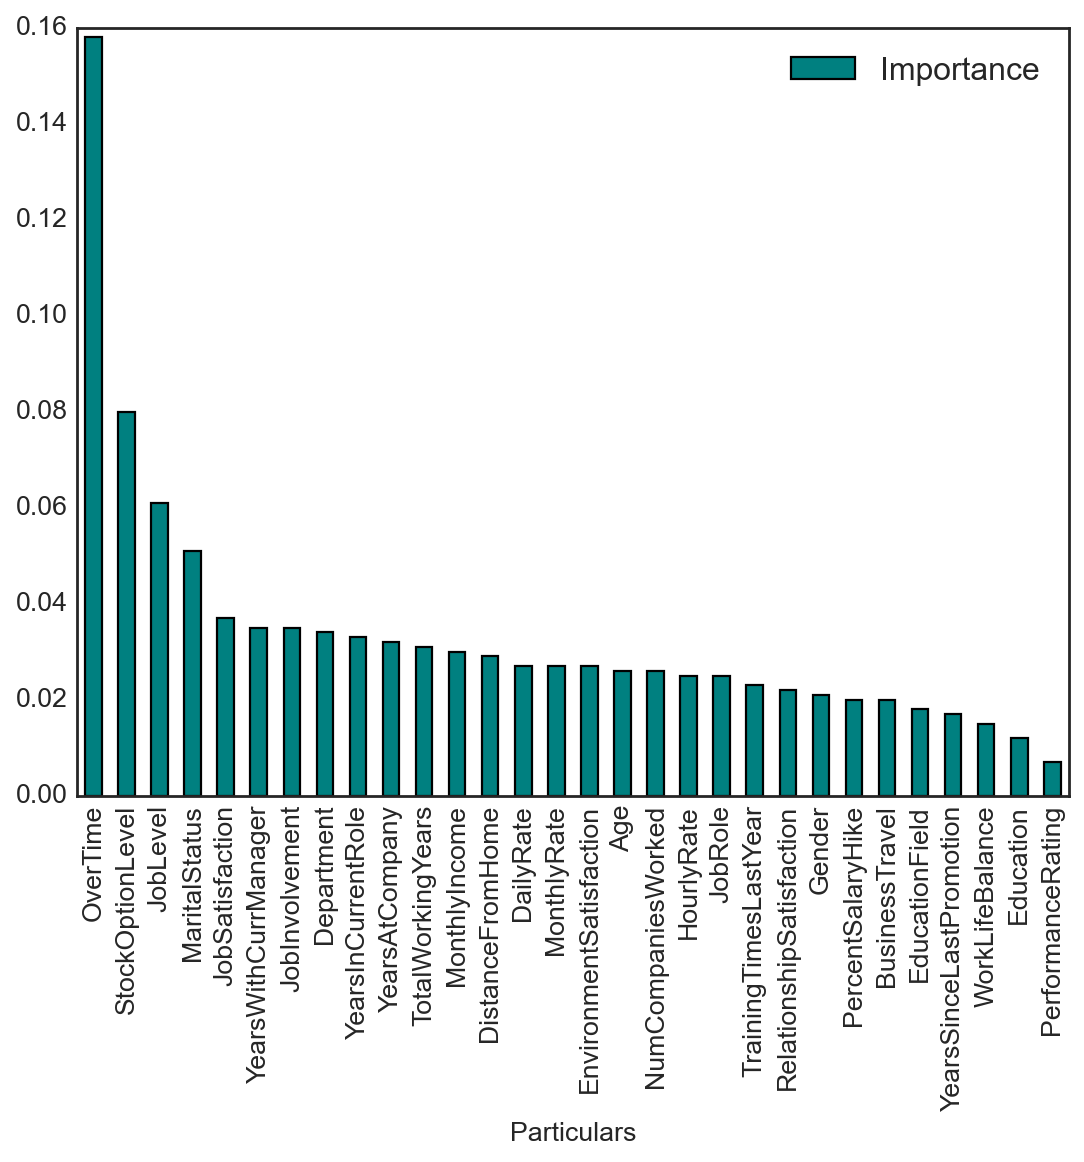

In [98]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Particulars':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Particulars')
importances.plot.bar(color='teal')
importances

#with Randomclassifier predicting the Importance and priority with the labels.

# ML Model for Classification with Evaluation Metrics

In [100]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=75)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [101]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 78.75647668393782

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       297
           1       0.77      0.80      0.79       282

    accuracy                           0.79       579
   macro avg       0.79      0.79      0.79       579
weighted avg       0.79      0.79      0.79       579

Cross Validation Score: 75.2624376256796

Accuracy Score - Cross Validation Score is 3.494039058258224


In [102]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 58.20379965457686

Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       297
           1       1.00      0.14      0.25       282

    accuracy                           0.58       579
   macro avg       0.78      0.57      0.48       579
weighted avg       0.77      0.58      0.49       579

Cross Validation Score: 57.7269680494526

Accuracy Score - Cross Validation Score is 0.4768316051242607


In [103]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 82.72884283246978

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       297
           1       0.81      0.85      0.83       282

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.83      0.83      0.83       579

Cross Validation Score: 83.47220153422208

Accuracy Score - Cross Validation Score is -0.7433587017522996


In [104]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.30051813471503

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       297
           1       0.99      0.89      0.94       282

    accuracy                           0.94       579
   macro avg       0.95      0.94      0.94       579
weighted avg       0.95      0.94      0.94       579

Cross Validation Score: 90.94445892604455

Accuracy Score - Cross Validation Score is 3.3560592086704872


In [105]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 67.87564766839378

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64       297
           1       0.63      0.80      0.71       282

    accuracy                           0.68       579
   macro avg       0.69      0.68      0.68       579
weighted avg       0.69      0.68      0.67       579

Cross Validation Score: 69.51822819691665

Accuracy Score - Cross Validation Score is -1.6425805285228705


In [106]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.02763385146805

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.97      0.95      0.96       282

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579

Cross Validation Score: 93.96114172935131

Accuracy Score - Cross Validation Score is 2.066492122116742


In [108]:
# XGB Classifier
import xgboost as xgb
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 93.09153713298791

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       297
           1       0.95      0.90      0.93       282

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation Score: 88.8750279288002

Accuracy Score - Cross Validation Score is 4.216509204187716


In [111]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\MT581\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.3.2             |   py38h885f38d_0         912 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         912 KB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-3.3.2-py38h885f38d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0




lightgbm-3.3.2       | 912 KB    |            |   0% 
lightgbm-3.3.2       | 912 KB    | 1          |   2% 
lightgbm-3.3.2       | 912 KB    | ######1    |  61% 
lightgbm-3.3.2       | 912 KB  

In [112]:
# LGBM Classifier
import lightgbm as lgb
model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 93.78238341968913

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       297
           1       0.96      0.91      0.93       282

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross Validation Score: 88.78900722424966

Accuracy Score - Cross Validation Score is 4.993376195439467


# Tuning on the best Classification ML Model

In [113]:
# Choosing Extra Trees Classifier as the best ML Model

fmod_param = {'criterion' : ["gini", "entropy"],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 350, 400],
              'min_samples_split' : [3, 4, 5],
              'random_state' : [42, 75, 111, 680, 895]
             }

In [116]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

#using GridSearch to best score for my ML Model

In [117]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [300, 350, 400],
                         'random_state': [42, 75, 111, 680, 895]})

In [118]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 4,
 'n_estimators': 350,
 'random_state': 680}

In [119]:
GSCV.best_score_

0.9384047169498825

In [123]:
Final_Model = ExtraTreesClassifier(criterion="entropy", max_depth=30, min_samples_split=3, 
                                   n_estimators=400, random_state=591)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 96.54576856649395


In [126]:
#AUC ROC Curve - And my final Score is 92%

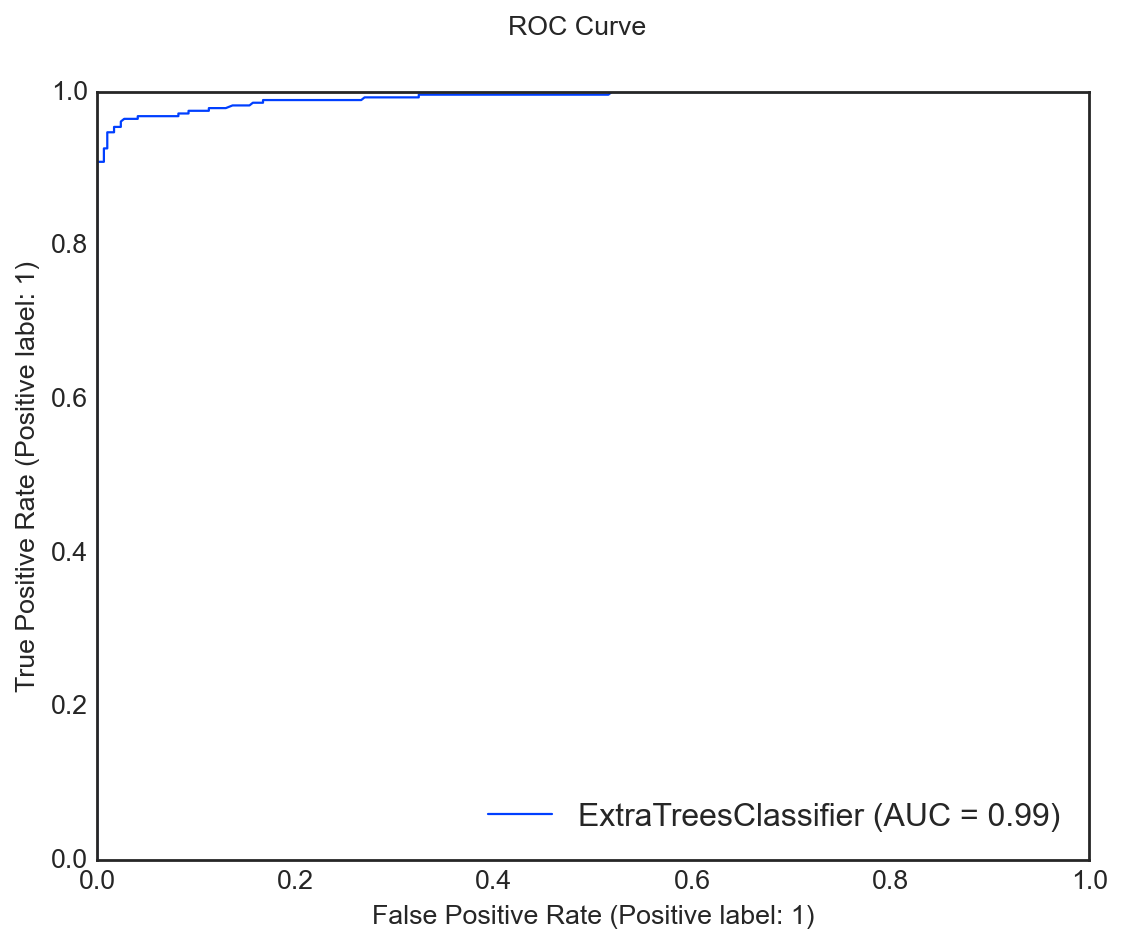

In [124]:
import sklearn.metrics as metrics
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [127]:
#the below Confusion matrix helps me to understand the number of times my model makes correct decision and the misses the correct prediction 
#(Black Box Shows the missed prediction)

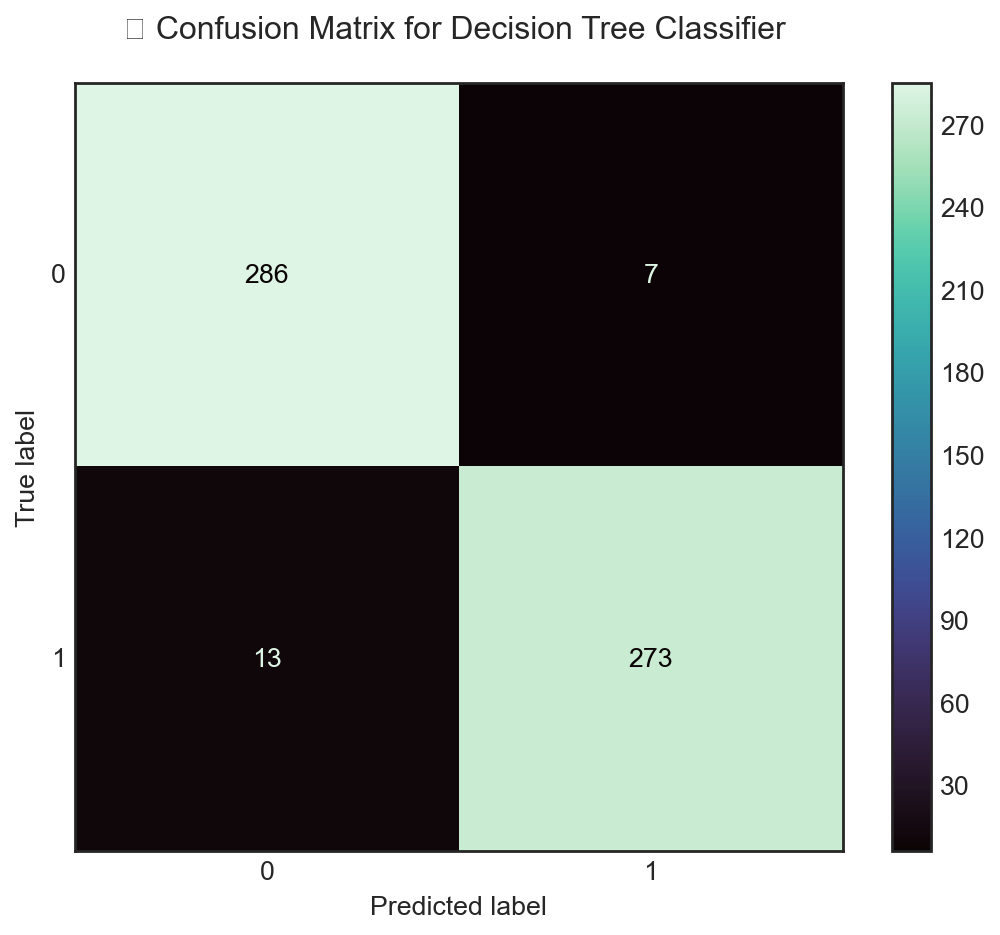

In [125]:
class_names = hra.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()